In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#PART A:

In [33]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FRA Module/CompData-1.xlsx")
df.head().round(2)

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00             0.46   
1                            4.230000e+09             0.46   
2                            8.150000e+08             0.45   
3                            0.000000e+00             0.46   
4                            0.000000e+00             0.46   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                                   0.0         0.00                  0.32   
1                                   0.0         0.00                  0.32   
2                                   0.0         0.00                  0.30   
3                                   0.0         0.01                  0.32   
4                                   0.0         0.40                  0.33   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                    0.19   
1                                    0.16   
2                                    0.17   
3                                    0.17   
4                                    0.18   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                      0.02  ...                  0.31   
1                                      0.02  ...                  0.31   
2                                      0.02  ...                  0.31   
3                                      0.03  ...                  0.32   
4                                      0.02  ...                  0.32   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                                  0.03                       0   
1                                  0.04                       0   
2                                  0.03                       0   
3                                  0.02                       0   
4                                  0.03                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                        0.03                 0.62   
1                        0.01                 0.62   
2                        0.00                 0.62   
3                        0.00                 0.62   
4                        0.01                 0.62   

   _Degree_of_Financial_Leverage_DFL  \
0                               0.03   
1                               0.03   
2                               0.03   
3                               0.03   
4                               0.03   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                               0.57                 1   
1                                               0.56                 1   
2                                               0.57                 1   
3                                               0.57                 1   
4                                               0.57                 1   

   _Equity_to_Liability  Default  
0                  0.02        0  
1                  0.03        1  
2                  0.04        0  
3                  0.03        0  
4                  0.02        0  

[5 rows x 58 columns]

In [34]:
df.shape

(2058, 58)

In [35]:
df.columns
new_columns = []
for i in df.columns:
  if i.startswith("_"):

    i = i.replace("_","",1)
    new_columns.append(i)
  else:
    new_columns.append(i)



In [36]:
df.columns = new_columns

In [37]:
df.head()

Co_Code          Co_Name  Operating_Expense_Rate  \
0    16974      Hind.Cables            8.820000e+09   
1    21214  Tata Tele. Mah.            9.380000e+09   
2    14852     ABG Shipyard            3.800000e+09   
3     2439              GTL            6.440000e+09   
4    23505  Bharati Defence            3.680000e+09   

   Research_and_development_expense_rate  Cash_flow_rate  \
0                           0.000000e+00        0.462045   
1                           4.230000e+09        0.460116   
2                           8.150000e+08        0.449893   
3                           0.000000e+00        0.462731   
4                           0.000000e+00        0.463117   

   Interest_bearing_debt_interest_rate  Tax_rate_A  Cash_Flow_Per_Share  \
0                             0.000352    0.001417             0.322558   
1                             0.000716    0.000000             0.315520   
2                             0.000496    0.000000             0.299851   
3                             0.000592    0.009313             0.319834   
4                             0.000782    0.400243             0.325104   

   Per_Share_Net_profit_before_tax_Yuan_  \
0                               0.194472   
1                               0.161633   
2                               0.172554   
3                               0.174738   
4                               0.176546   

   Realized_Sales_Gross_Profit_Growth_Rate  ...  Cash_Flow_to_Equity  \
0                                 0.022074  ...             0.310901   
1                                 0.021902  ...             0.314572   
2                                 0.022186  ...             0.314777   
3                                 0.027638  ...             0.316974   
4                                 0.022072  ...             0.317729   

   Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
0                             0.034913                      0   
1                             0.041653                      0   
2                             0.033560                      0   
3                             0.016527                      0   
4                             0.034497                      0   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                   0.028801            0.620927   
1                   0.006191            0.622513   
2                   0.001095            0.623749   
3                   0.003749            0.622963   
4                   0.006595            0.624419   

   Degree_of_Financial_Leverage_DFL  \
0                          0.026930   
1                          0.026297   
2                          0.027276   
3                          0.026988   
4                          0.027498   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Net_Income_Flag  \
0                                          0.565744                1   
1                                          0.560741                1   
2                                          0.566744                1   
3                                          0.565950                1   
4                                          0.567177                1   

   Equity_to_Liability  Default  
0             0.015338        0  
1             0.029445        1  
2             0.041718        0  
3             0.026956        0  
4             0.019900        0  

[5 rows x 58 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [39]:
df[df.columns[df.isnull().any()].values].isnull().sum()

Cash_Flow_Per_Share                    167
Total_debt_to_Total_net_worth           21
Cash_to_Total_Assets                    96
Current_Liability_to_Current_Assets     14
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
df.describe().round(2).T


count          mean  \
Co_Code                                           2058.0  1.757211e+04   
Operating_Expense_Rate                            2058.0  2.052389e+09   
Research_and_development_expense_rate             2058.0  1.208634e+09   
Cash_flow_rate                                    2058.0  4.700000e-01   
Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
Tax_rate_A                                        2058.0  1.100000e-01   
Cash_Flow_Per_Share                               1891.0  3.200000e-01   
Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.800000e-01   
Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.000000e-02   
Operating_Profit_Growth_Rate                      2058.0  8.500000e-01   
Continuous_Net_Profit_Growth_Rate                 2058.0  2.200000e-01   
Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
Net_Value_Growth_Rate                             2058.0  5.189504e+06   
Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.600000e-01   
Cash_Reinvestment_perc                            2058.0  3.800000e-01   
Current_Ratio                                     2058.0  1.336249e+06   
Quick_Ratio                                       2058.0  2.775510e+07   
Interest_Expense_Ratio                            2058.0  6.300000e-01   
Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
Long_term_fund_suitability_ratio_A                2058.0  1.000000e-02   
Net_profit_before_tax_to_Paid_in_capital          2058.0  1.800000e-01   
Total_Asset_Turnover                              2058.0  1.300000e-01   
Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
Average_Collection_Days                           2058.0  2.629786e+07   
Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
Net_Worth_Turnover_Rate_times                     2058.0  4.000000e-02   
Operating_profit_per_person                       2058.0  4.000000e-01   
Allocation_rate_per_person                        2058.0  5.725559e+06   
Quick_Assets_to_Total_Assets                      2058.0  3.400000e-01   
Cash_to_Total_Assets                              1962.0  8.000000e-02   
Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
Cash_to_Current_Liability                         2058.0  9.282507e+07   
Operating_Funds_to_Liability                      2058.0  3.500000e-01   
Inventory_to_Working_Capital                      2058.0  2.800000e-01   
Inventory_to_Current_Liability                    2058.0  5.786346e+07   
Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
Retained_Earnings_to_Total_Assets                 2058.0  9.300000e-01   
Total_income_to_Total_expense                     2058.0  0.000000e+00   
Total_expense_to_Assets                           2058.0  3.000000e-02   
Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
Cash_Turnover_Rate                                2058.0  2.653696e+09   
Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
Cash_Flow_to_Total_Assets                         2058.0  6.400000e-01   
Cash_Flow_to_Liability                            2058.0  4.600000e-01   
CFO_to_Assets                                     2058.0  5.800000e-01   
Cash_Flow_to_Equity                               2058.0  3.100000e-01   
Current_Liability_to_Current_Assets               2044.0  4.000000e-02   
Liability_Assets_Flag                             2058.0  0.000000e+00   
Total_assets_to_GNP_price                         2058.0  2.779397e+07   
No_credit_Interval                                2058.0  6.200000e-01   
Degree_of_Financial_Leverage_DFL                  2058.0  3.000000e-02   
Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.

##Outlier Treatment

Box plot before outlier treatment

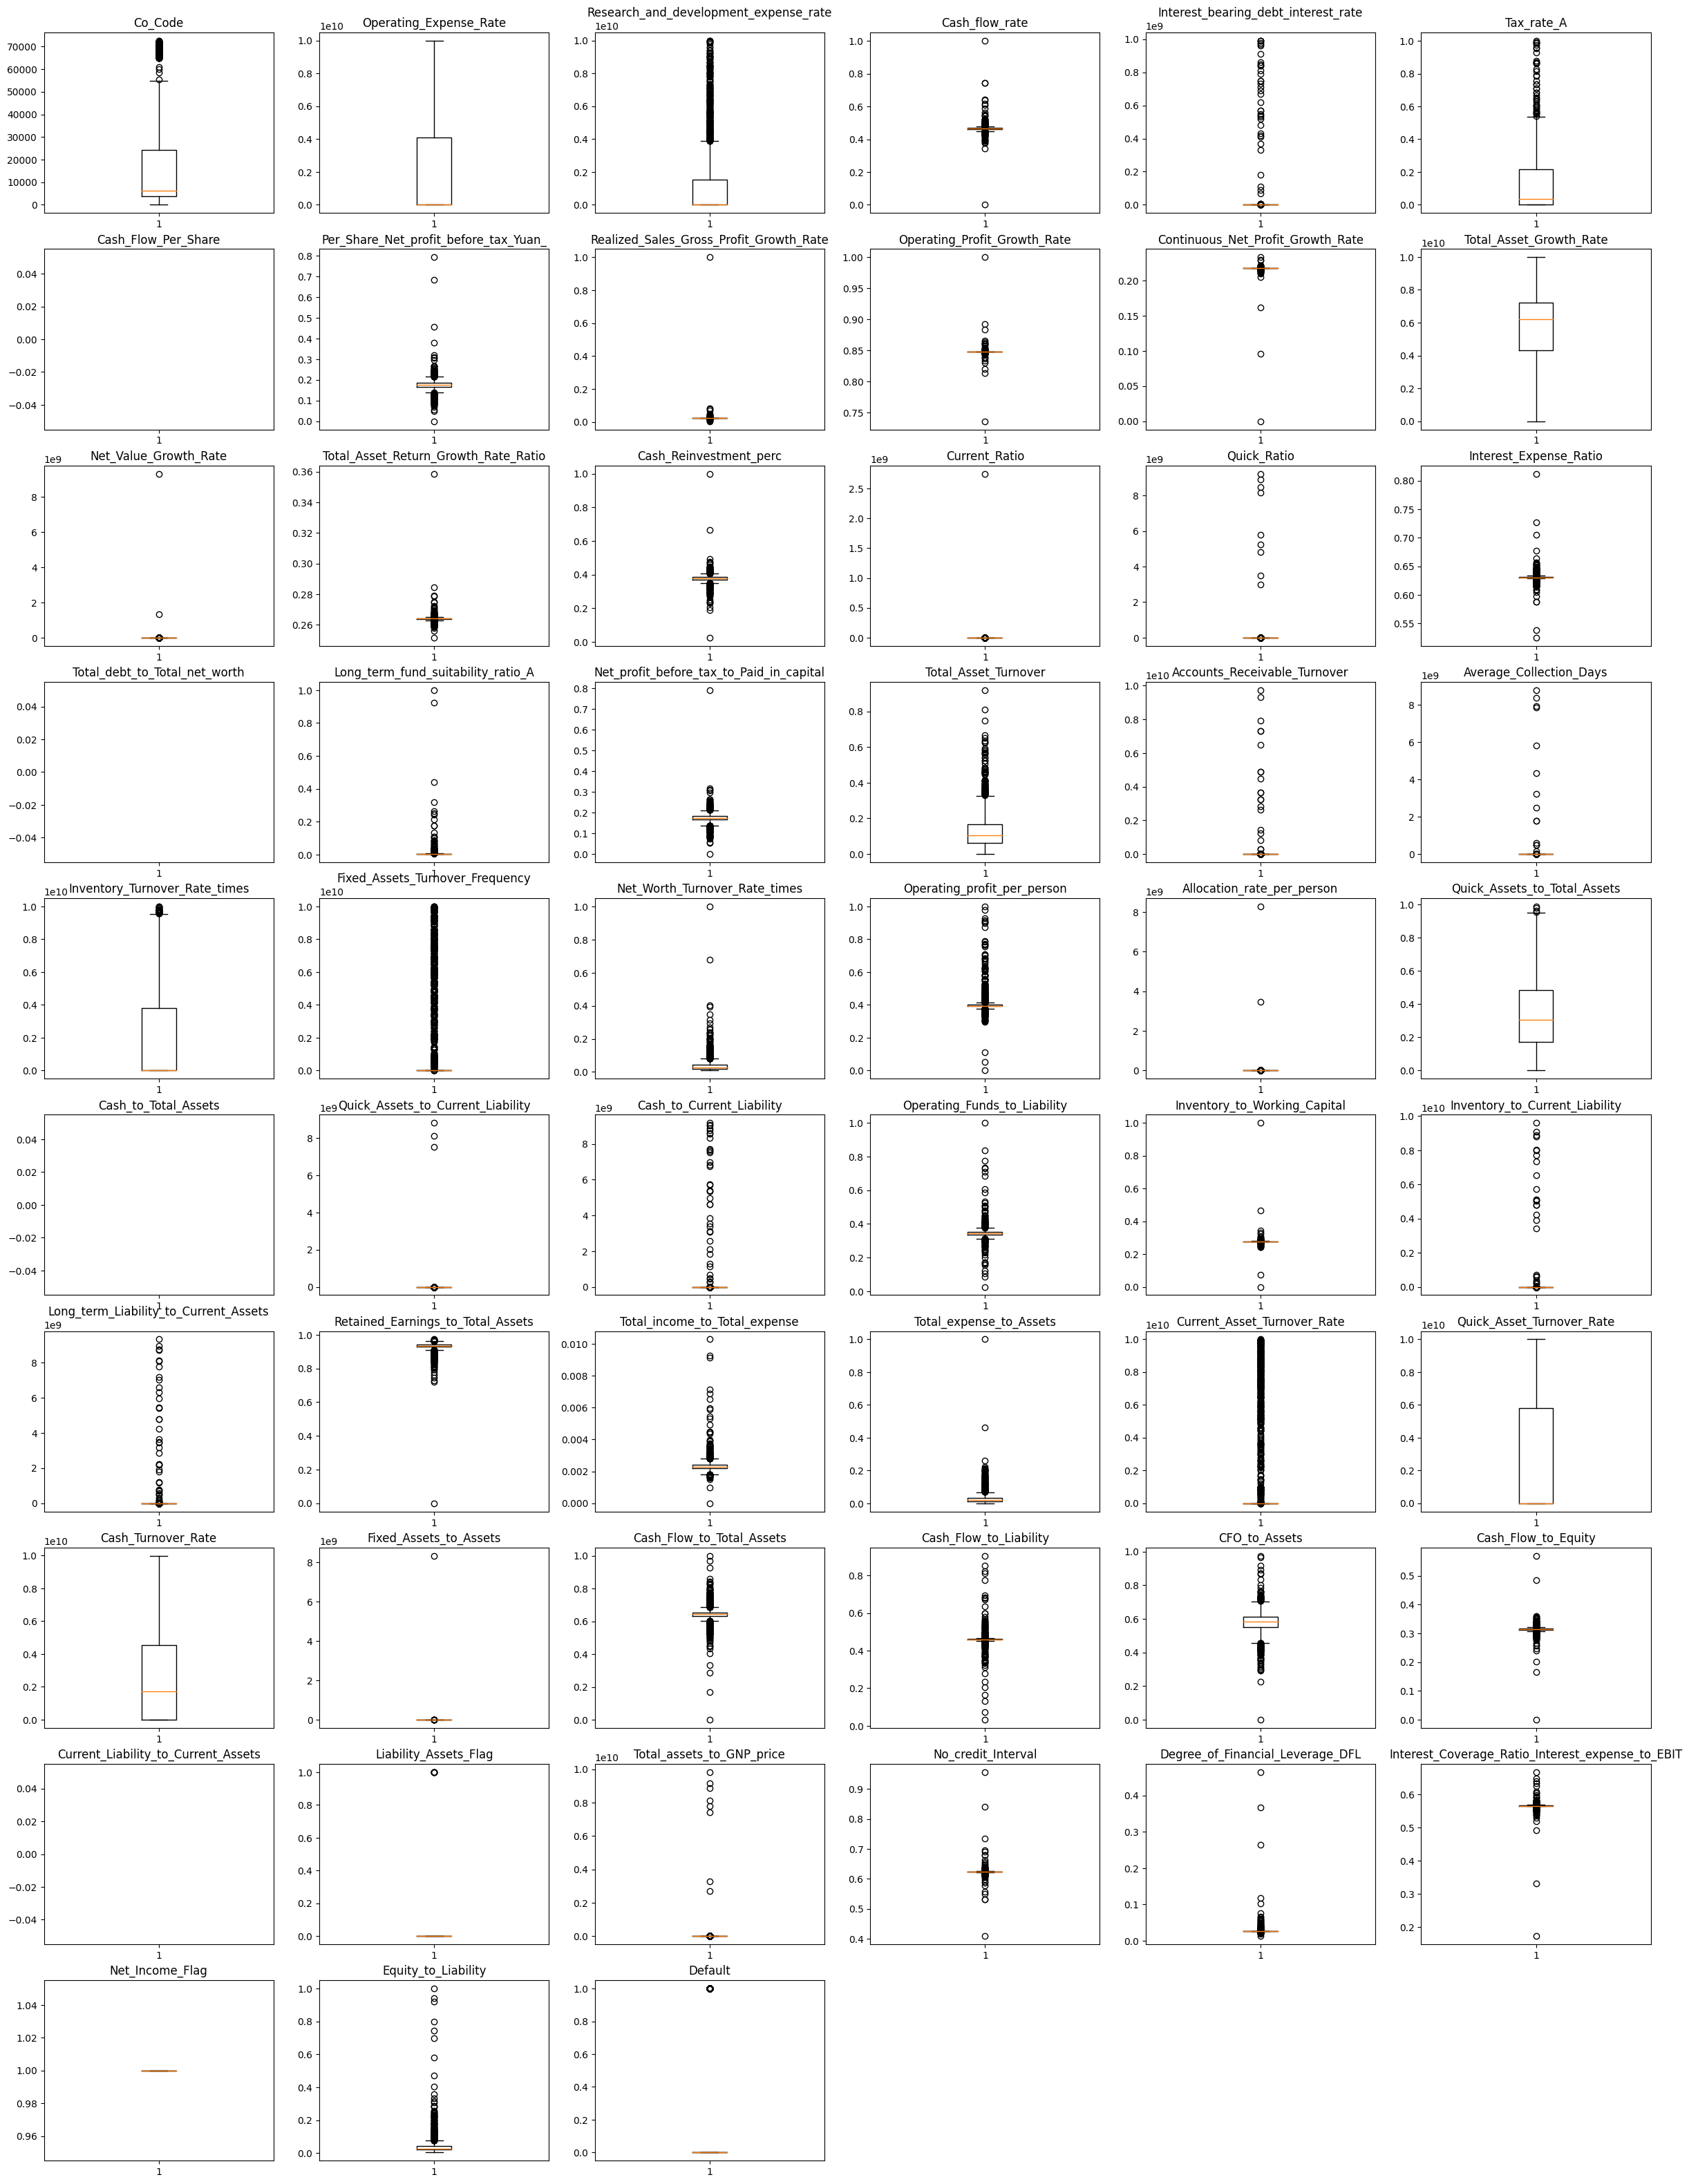

In [42]:
num_columns = df.select_dtypes(exclude='object').columns

count = 1
plt.figure(figsize=(30,40))
for i in num_columns:

  plt.subplot(10,6,count)
  count=count+1
  plt.boxplot(df[i])
  plt.title(i)
plt.show()

histplots for numeric columns

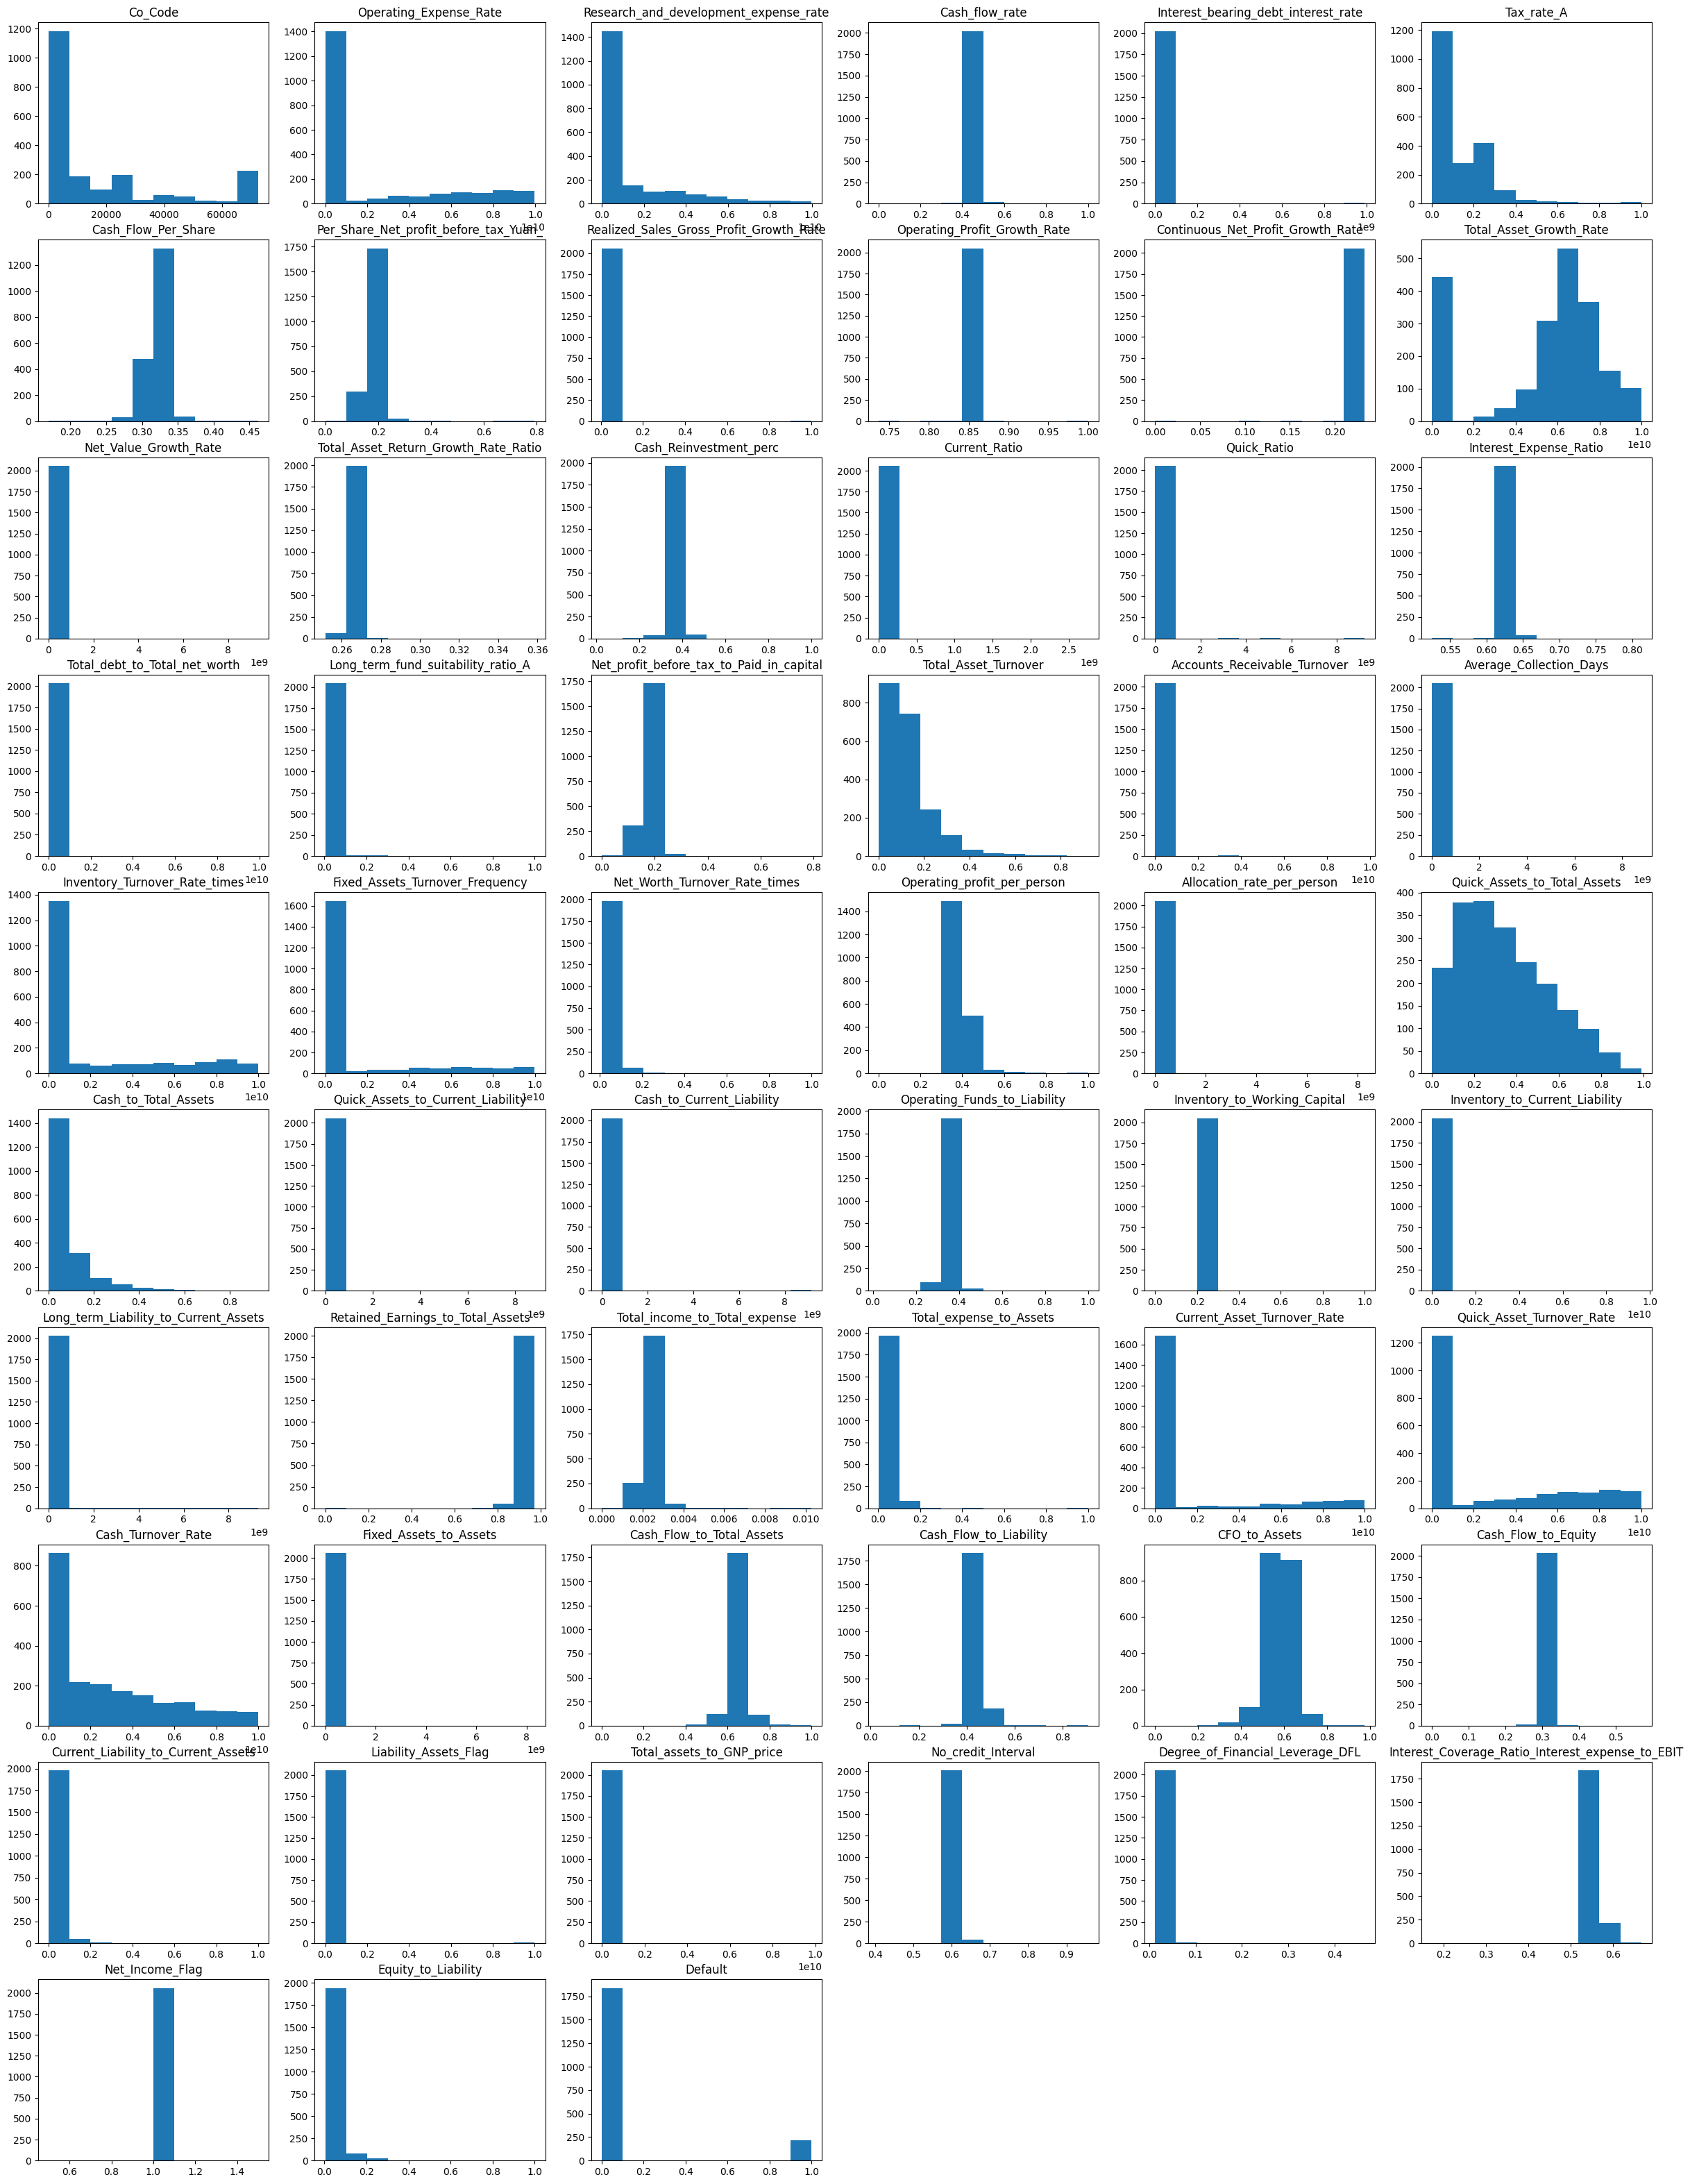

In [43]:
count = 1
plt.figure(figsize=(30,40))
for i in num_columns:

  plt.subplot(10,6,count)
  count=count+1
  plt.hist(df[i],histtype="stepfilled")
  #sb.histplot(df[i],kde=True)
  plt.title(i)
plt.show()

In [44]:
def get_boundary_values(data):
  data= sorted(data)
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  IQR = q3 - q1
  lr = q1 - (1.5*IQR)
  ur = (1.5*IQR)+q3
  return lr,ur
for i in num_columns:
  if(i=="Default"):
    continue
  lr,ur = get_boundary_values(df[i])
  df[i] = np.where(df[i]<lr,lr,np.where(df[i]>ur,ur,df[i]))

Boxplot after outlier treatment

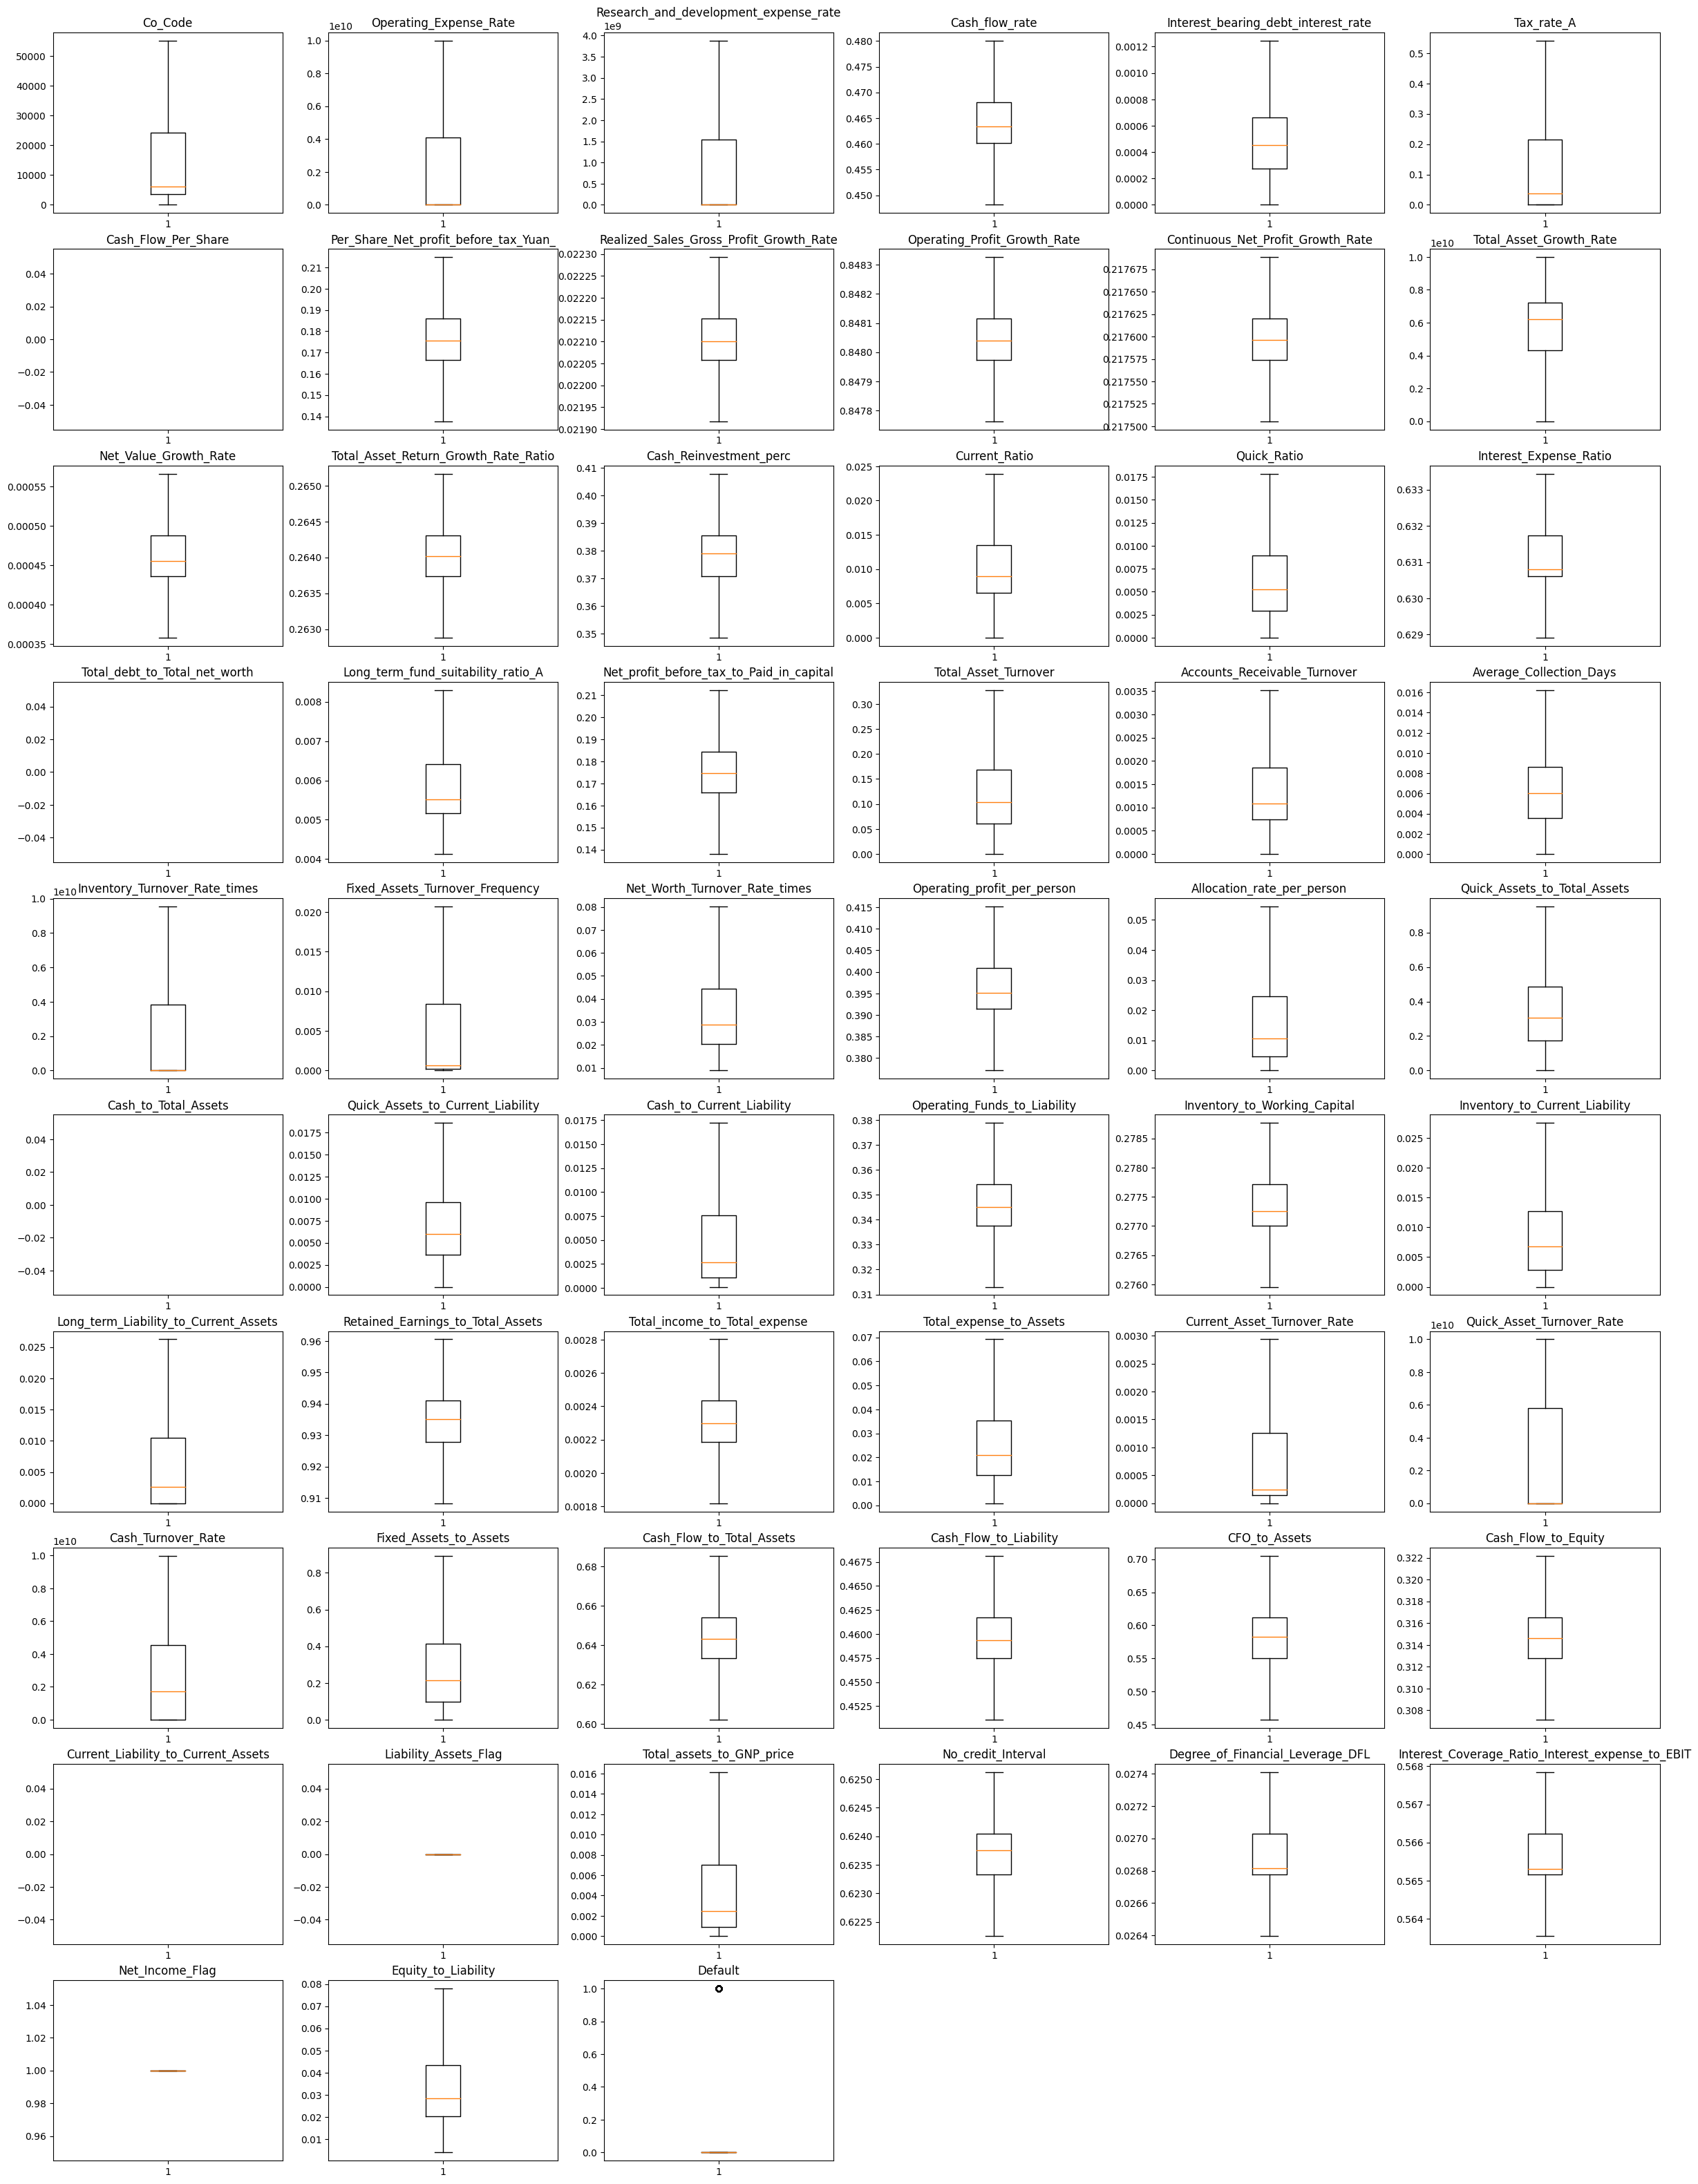

In [45]:
num_columns = df.select_dtypes(exclude='object').columns
count = 1
plt.figure(figsize=(30,40))
for i in num_columns:

  plt.subplot(10,6,count)
  count=count+1
  plt.boxplot(df[i])
  plt.title(i)
plt.show()

Note that the columns with nulls were not treated yet, they will be treated after imputing nulls.

##Missing Value Treatment

In [46]:
df[df.columns[df.isnull().any()].values].isnull().sum()

Cash_Flow_Per_Share                    167
Total_debt_to_Total_net_worth           21
Cash_to_Total_Assets                    96
Current_Liability_to_Current_Assets     14
dtype: int64

In [47]:
df["Cash_Flow_Per_Share"] = df["Cash_Flow_Per_Share"].fillna(df["Cash_Flow_Per_Share"].mean())
df["Total_debt_to_Total_net_worth"] = df["Total_debt_to_Total_net_worth"].fillna(df["Total_debt_to_Total_net_worth"].mean())
df["Cash_to_Total_Assets"] = df["Cash_to_Total_Assets"].fillna(df["Cash_to_Total_Assets"].mean())
df["Current_Liability_to_Current_Assets"] = df["Current_Liability_to_Current_Assets"].fillna(df["Current_Liability_to_Current_Assets"].mean())

Treating outliers in the null imputed columns

In [48]:
def get_boundary_values(data):
  data= sorted(data)
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  IQR = q3 - q1
  lr = q1 - (1.5*IQR)
  ur = (1.5*IQR)+q3
  return lr,ur
for i in num_columns:
  if(i=="Default"):
    continue
  lr,ur = get_boundary_values(df[i])
  df[i] = np.where(df[i]<lr,lr,np.where(df[i]>ur,ur,df[i]))

In [49]:
df[df.columns[df.isnull().any()].values].isnull().sum()
df.isnull().sum()

Co_Code                                             0
Co_Name                                             0
Operating_Expense_Rate                              0
Research_and_development_expense_rate               0
Cash_flow_rate                                      0
Interest_bearing_debt_interest_rate                 0
Tax_rate_A                                          0
Cash_Flow_Per_Share                                 0
Per_Share_Net_profit_before_tax_Yuan_               0
Realized_Sales_Gross_Profit_Growth_Rate             0
Operating_Profit_Growth_Rate                        0
Continuous_Net_Profit_Growth_Rate                   0
Total_Asset_Growth_Rate                             0
Net_Value_Growth_Rate                               0
Total_Asset_Return_Growth_Rate_Ratio                0
Cash_Reinvestment_perc                              0
Current_Ratio                                       0
Quick_Ratio                                         0
Interest_Expense_Ratio      

##PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

In [50]:
df.head()

Co_Code          Co_Name  Operating_Expense_Rate  \
0  16974.0      Hind.Cables            8.820000e+09   
1  21214.0  Tata Tele. Mah.            9.380000e+09   
2  14852.0     ABG Shipyard            3.800000e+09   
3   2439.0              GTL            6.440000e+09   
4  23505.0  Bharati Defence            3.680000e+09   

   Research_and_development_expense_rate  Cash_flow_rate  \
0                           0.000000e+00        0.462045   
1                           3.875000e+09        0.460116   
2                           8.150000e+08        0.449893   
3                           0.000000e+00        0.462731   
4                           0.000000e+00        0.463117   

   Interest_bearing_debt_interest_rate  Tax_rate_A  Cash_Flow_Per_Share  \
0                             0.000352    0.001417             0.322558   
1                             0.000716    0.000000             0.315520   
2                             0.000496    0.000000             0.301182   
3                             0.000592    0.009313             0.319834   
4                             0.000782    0.400243             0.325104   

   Per_Share_Net_profit_before_tax_Yuan_  \
0                               0.194472   
1                               0.161633   
2                               0.172554   
3                               0.174738   
4                               0.176546   

   Realized_Sales_Gross_Profit_Growth_Rate  ...  Cash_Flow_to_Equity  \
0                                 0.022074  ...             0.310901   
1                                 0.021918  ...             0.314572   
2                                 0.022186  ...             0.314777   
3                                 0.022293  ...             0.316974   
4                                 0.022072  ...             0.317729   

   Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
0                             0.034913                    0.0   
1                             0.041653                    0.0   
2                             0.033560                    0.0   
3                             0.016527                    0.0   
4                             0.034497                    0.0   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                   0.016143            0.622251   
1                   0.006191            0.622513   
2                   0.001095            0.623749   
3                   0.003749            0.622963   
4                   0.006595            0.624419   

   Degree_of_Financial_Leverage_DFL  \
0                          0.026930   
1                          0.026395   
2                          0.027276   
3                          0.026988   
4                          0.027410   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Net_Income_Flag  \
0                                          0.565744              1.0   
1                                          0.563546              1.0   
2                                          0.566744              1.0   
3                                          0.565950              1.0   
4                                          0.567177              1.0   

   Equity_to_Liability  Default  
0             0.015338        0  
1             0.029445        1  
2             0.041718        0  
3             0.026956        0  
4             0.019900        0  

[5 rows x 58 columns]

###Univariate Analysis

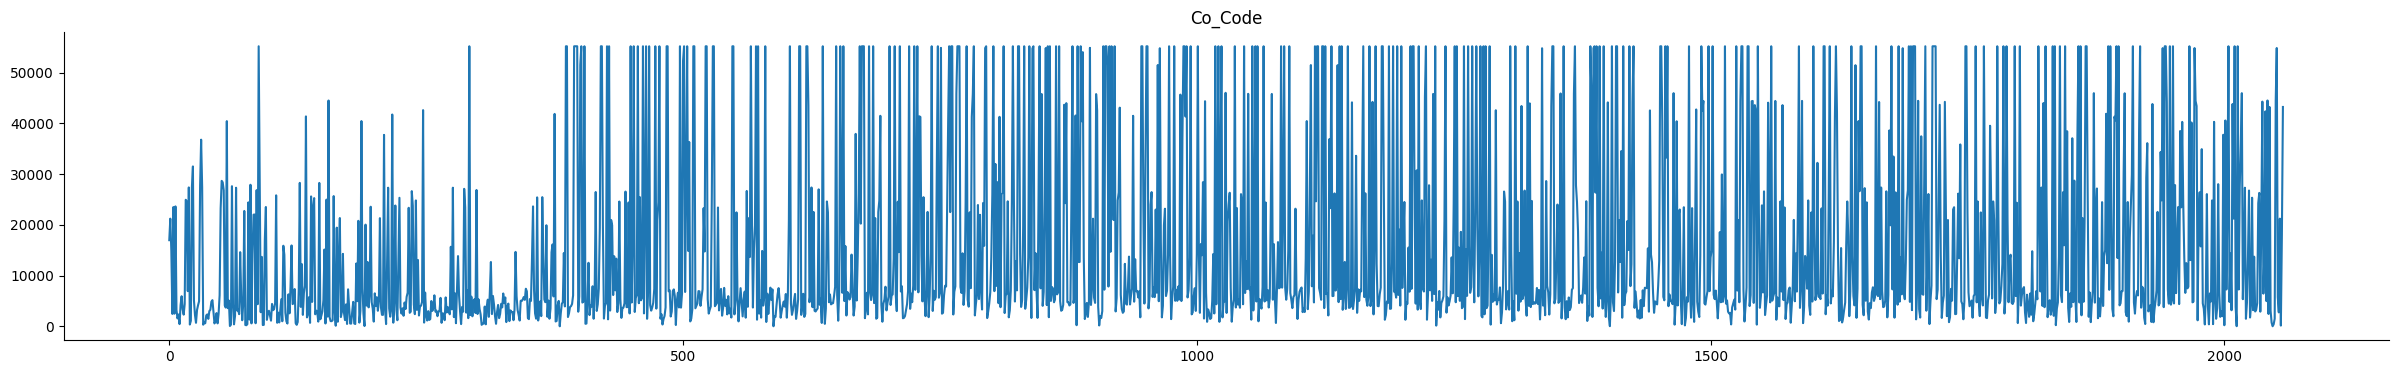

In [51]:
from matplotlib import pyplot as plt
df['Co_Code'].plot(kind='line', figsize=(30, 4), title='Co_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

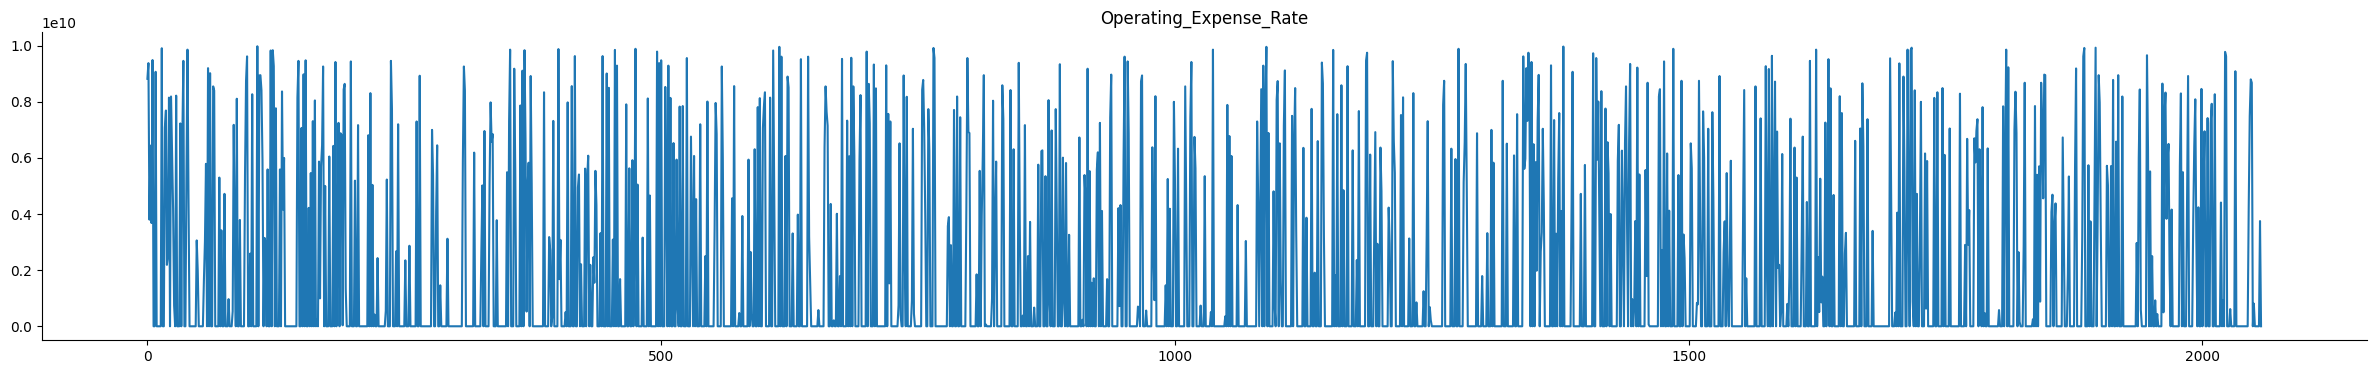

In [52]:
from matplotlib import pyplot as plt
df['Operating_Expense_Rate'].plot(kind='line', figsize=(30, 4), title='Operating_Expense_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

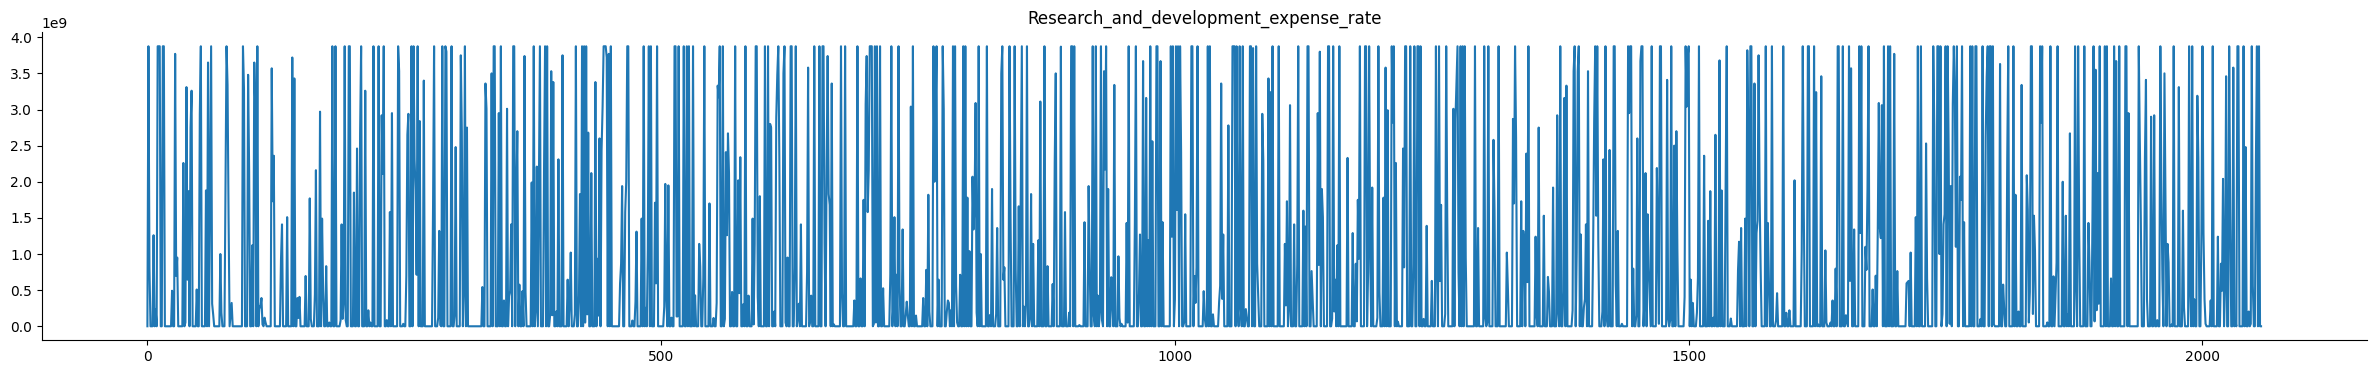

In [53]:
from matplotlib import pyplot as plt
df['Research_and_development_expense_rate'].plot(kind='line', figsize=(30, 4), title='Research_and_development_expense_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

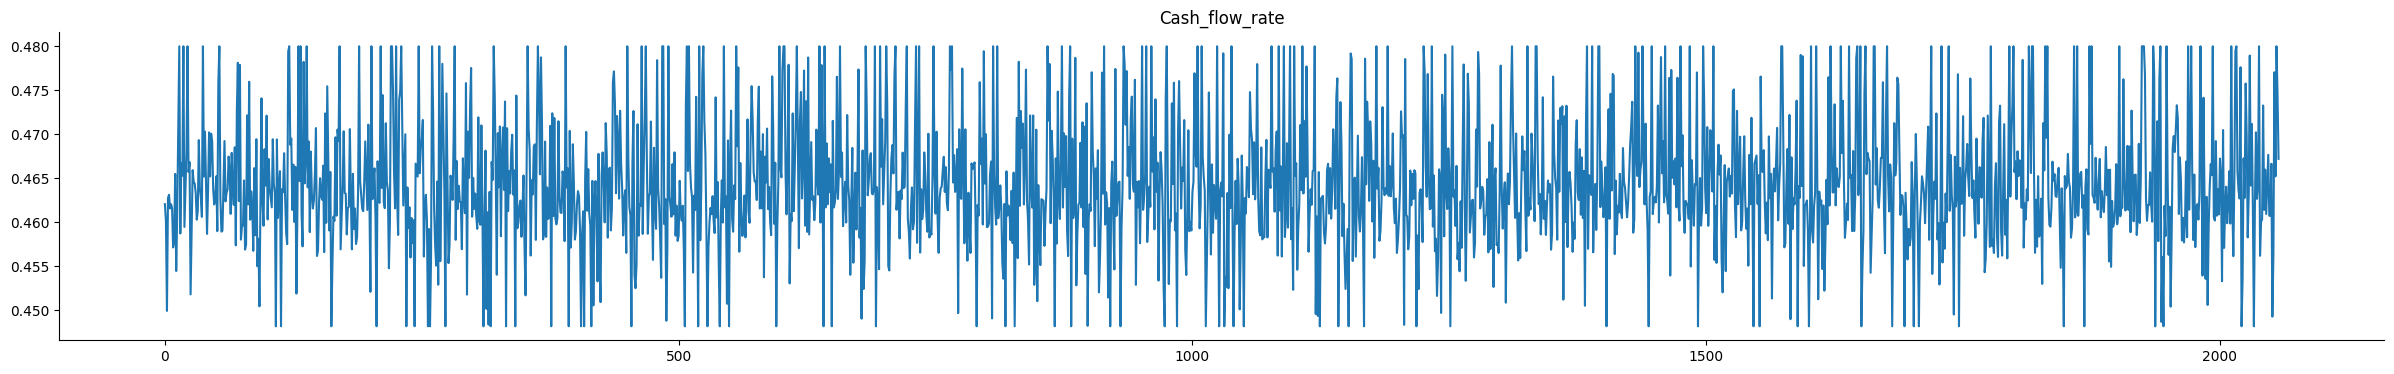

In [54]:
from matplotlib import pyplot as plt
df['Cash_flow_rate'].plot(kind='line', figsize=(30, 4), title='Cash_flow_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

Distribution of Company Names

In [55]:
df.Co_Name.value_counts(normalize=True)

Hind.Cables         0.000486
Ritesh Intl.        0.000486
Panther Indl. Pr    0.000486
Manglam India       0.000486
Guj. Investa        0.000486
                      ...   
Pulz Electronics    0.000486
Ashiana Agro Ind    0.000486
Rose Merc.          0.000486
Overseas Synth      0.000486
Channel Nine        0.000486
Name: Co_Name, Length: 2058, dtype: float64

###Bivariate Analysis

In [56]:
corr_columns = new_columns.copy()

In [57]:
corr_columns.remove("Net_Income_Flag")
#corr_columns.remove("Liability_Assets_Flag")

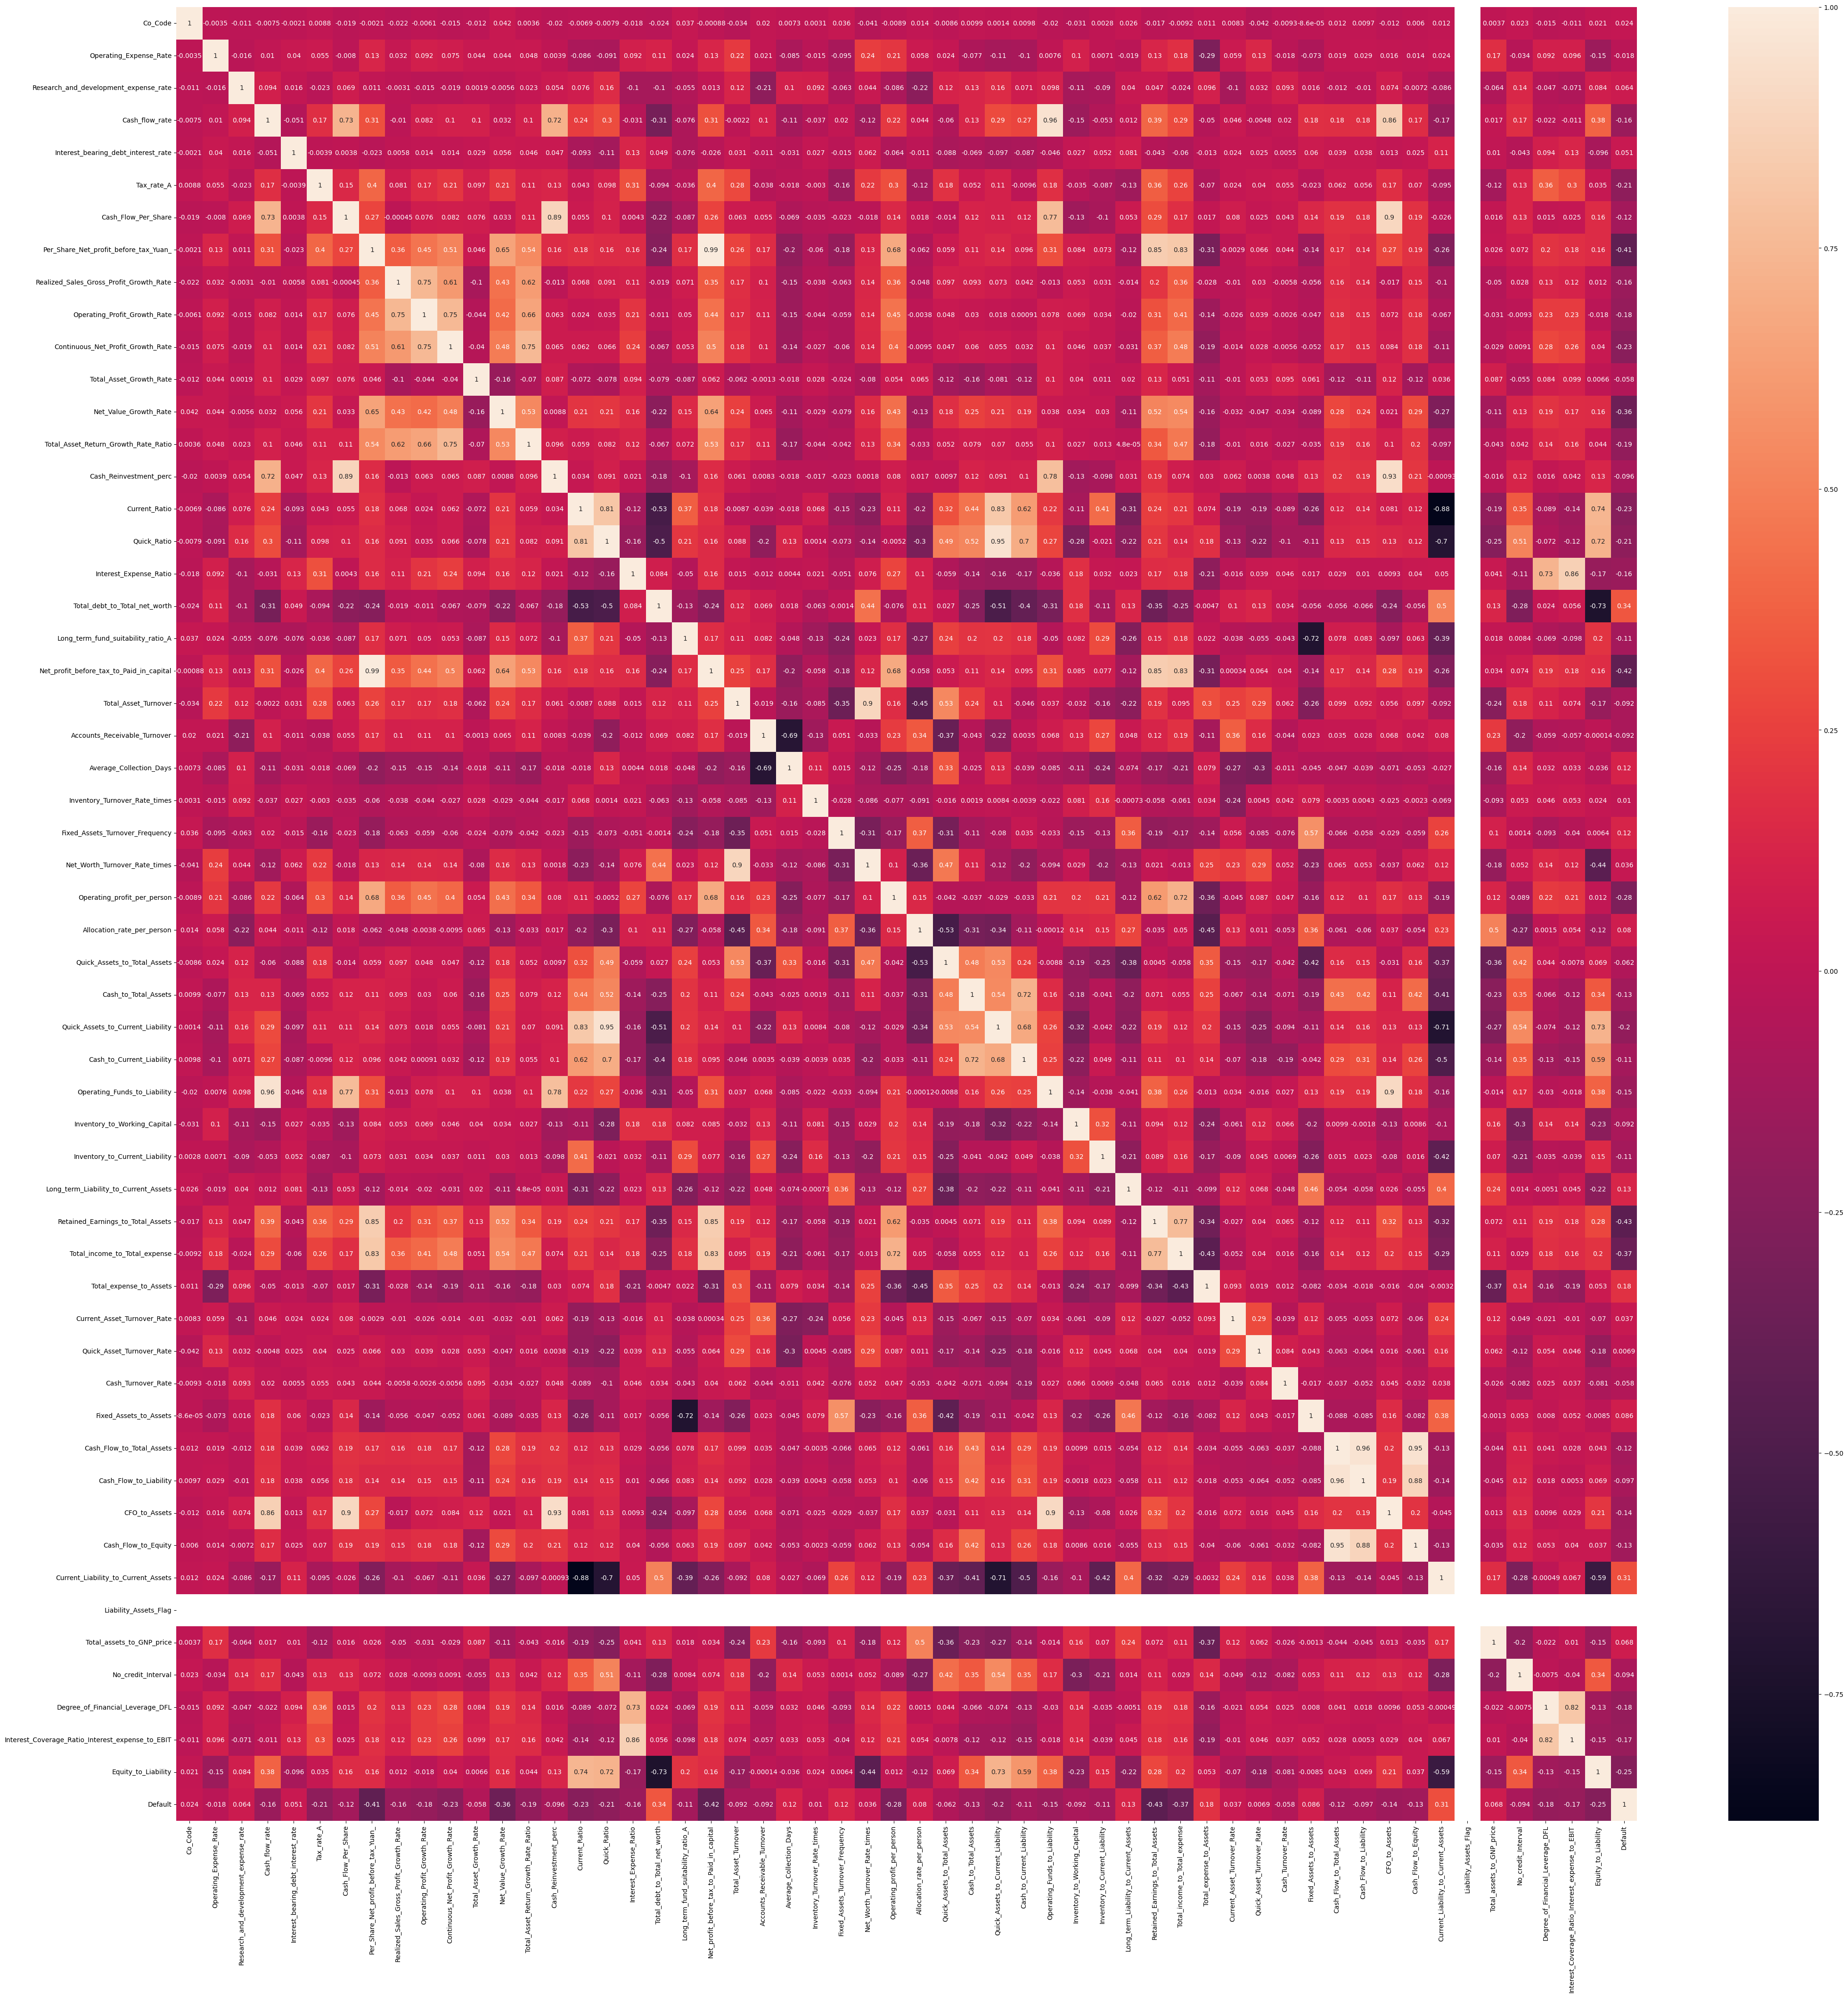

In [58]:
plt.figure(figsize=(50,50))
sb.heatmap(df[corr_columns].corr(numeric_only=True),annot=True);


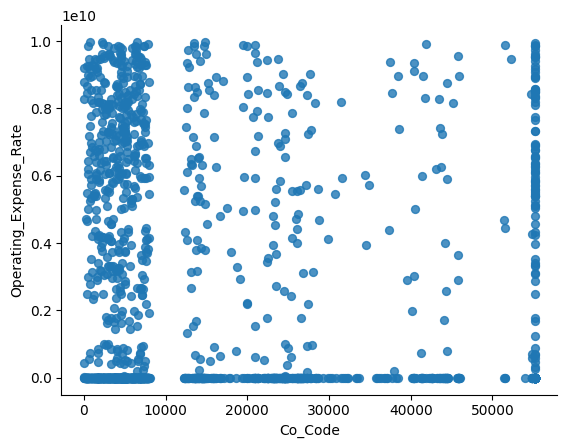

In [59]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Co_Code', y='Operating_Expense_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

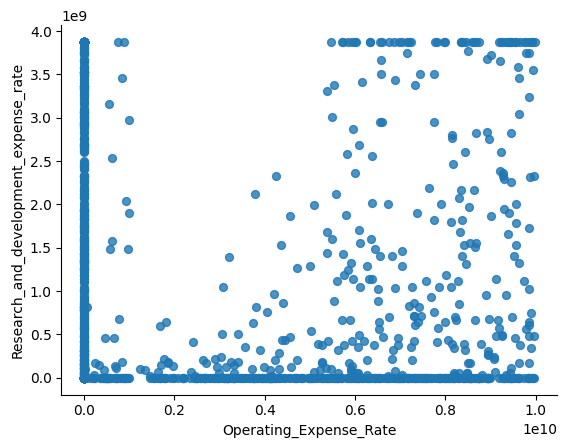

In [60]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Operating_Expense_Rate', y='Research_and_development_expense_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

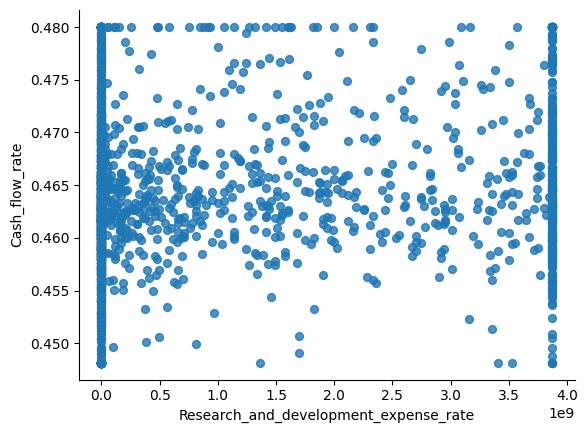

In [61]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Research_and_development_expense_rate', y='Cash_flow_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

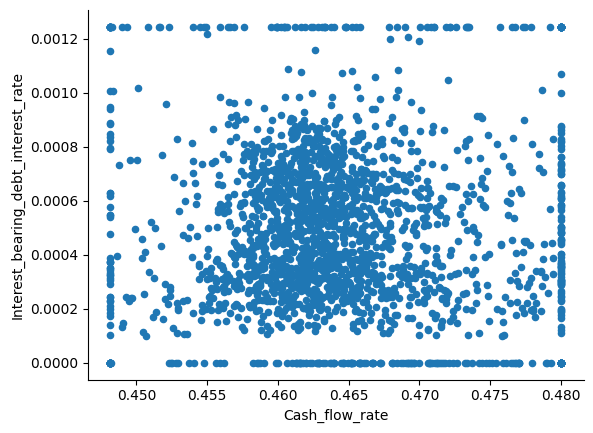

In [62]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cash_flow_rate', y='Interest_bearing_debt_interest_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

##PART A: Train Test Split

In [63]:
x= df.drop(['Co_Name','Default'],axis=1)
y= df['Default']
print("Feature dataset has {0} rows and {1} columns".format(x.shape[0],x.shape[1]))
print("Shape of target dataset: ",y.shape)

Feature dataset has 2058 rows and 56 columns
Shape of target dataset:  (2058,)


In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
x_train, x_test,y_train, y_test = train_test_split(X_res,y_res,stratify=y_res,test_size=0.33,random_state=42)
print("Shape of training predictor dataset(x_train): ",x_train.shape)
print("Shape of test predictor dataset(x_test): ",x_test.shape)
print("Shape of training target dataset(y_train): ",y_train.shape)
print("Shape of test target dataset(y_test): ",y_test.shape)



Shape of training predictor dataset(x_train):  (2462, 56)
Shape of test predictor dataset(x_test):  (1214, 56)
Shape of training target dataset(y_train):  (2462,)
Shape of test target dataset(y_test):  (1214,)


##PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

Applying SMOTE to improve model accuracy

In [65]:
features= ' + '.join(x_train.columns)
features = 'Default ~ '+features
print(features)


Default ~ Co_Code + Operating_Expense_Rate + Research_and_development_expense_rate + Cash_flow_rate + Interest_bearing_debt_interest_rate + Tax_rate_A + Cash_Flow_Per_Share + Per_Share_Net_profit_before_tax_Yuan_ + Realized_Sales_Gross_Profit_Growth_Rate + Operating_Profit_Growth_Rate + Continuous_Net_Profit_Growth_Rate + Total_Asset_Growth_Rate + Net_Value_Growth_Rate + Total_Asset_Return_Growth_Rate_Ratio + Cash_Reinvestment_perc + Current_Ratio + Quick_Ratio + Interest_Expense_Ratio + Total_debt_to_Total_net_worth + Long_term_fund_suitability_ratio_A + Net_profit_before_tax_to_Paid_in_capital + Total_Asset_Turnover + Accounts_Receivable_Turnover + Average_Collection_Days + Inventory_Turnover_Rate_times + Fixed_Assets_Turnover_Frequency + Net_Worth_Turnover_Rate_times + Operating_profit_per_person + Allocation_rate_per_person + Quick_Assets_to_Total_Assets + Cash_to_Total_Assets + Quick_Assets_to_Current_Liability + Cash_to_Current_Liability + Operating_Funds_to_Liability + Inventory

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logr = LogisticRegression()
selector  = RFE(estimator = logr, n_features_to_select=20, step=1 )
selector = selector.fit(x_train,y_train)
best_features = pd.DataFrame({'Feature': x_train.columns, 'Rank': selector.ranking_})
best_columns1=" + ".join(best_features[best_features['Rank'] == 1].Feature.values)
best_columns = best_features[best_features['Rank'] == 1].Feature.values

In [67]:
best_columns

array(['Co_Code', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Tax_rate_A', 'Operating_Profit_Growth_Rate',
       'Total_Asset_Growth_Rate', 'Cash_Reinvestment_perc',
       'Interest_Expense_Ratio', 'Inventory_Turnover_Rate_times',
       'Quick_Assets_to_Total_Assets',
       'Retained_Earnings_to_Total_Assets', 'Quick_Asset_Turnover_Rate',
       'Cash_Turnover_Rate', 'Fixed_Assets_to_Assets',
       'Cash_Flow_to_Total_Assets', 'Cash_Flow_to_Liability',
       'No_credit_Interval',
       'Interest_Coverage_Ratio_Interest_expense_to_EBIT',
       'Net_Income_Flag'], dtype=object)

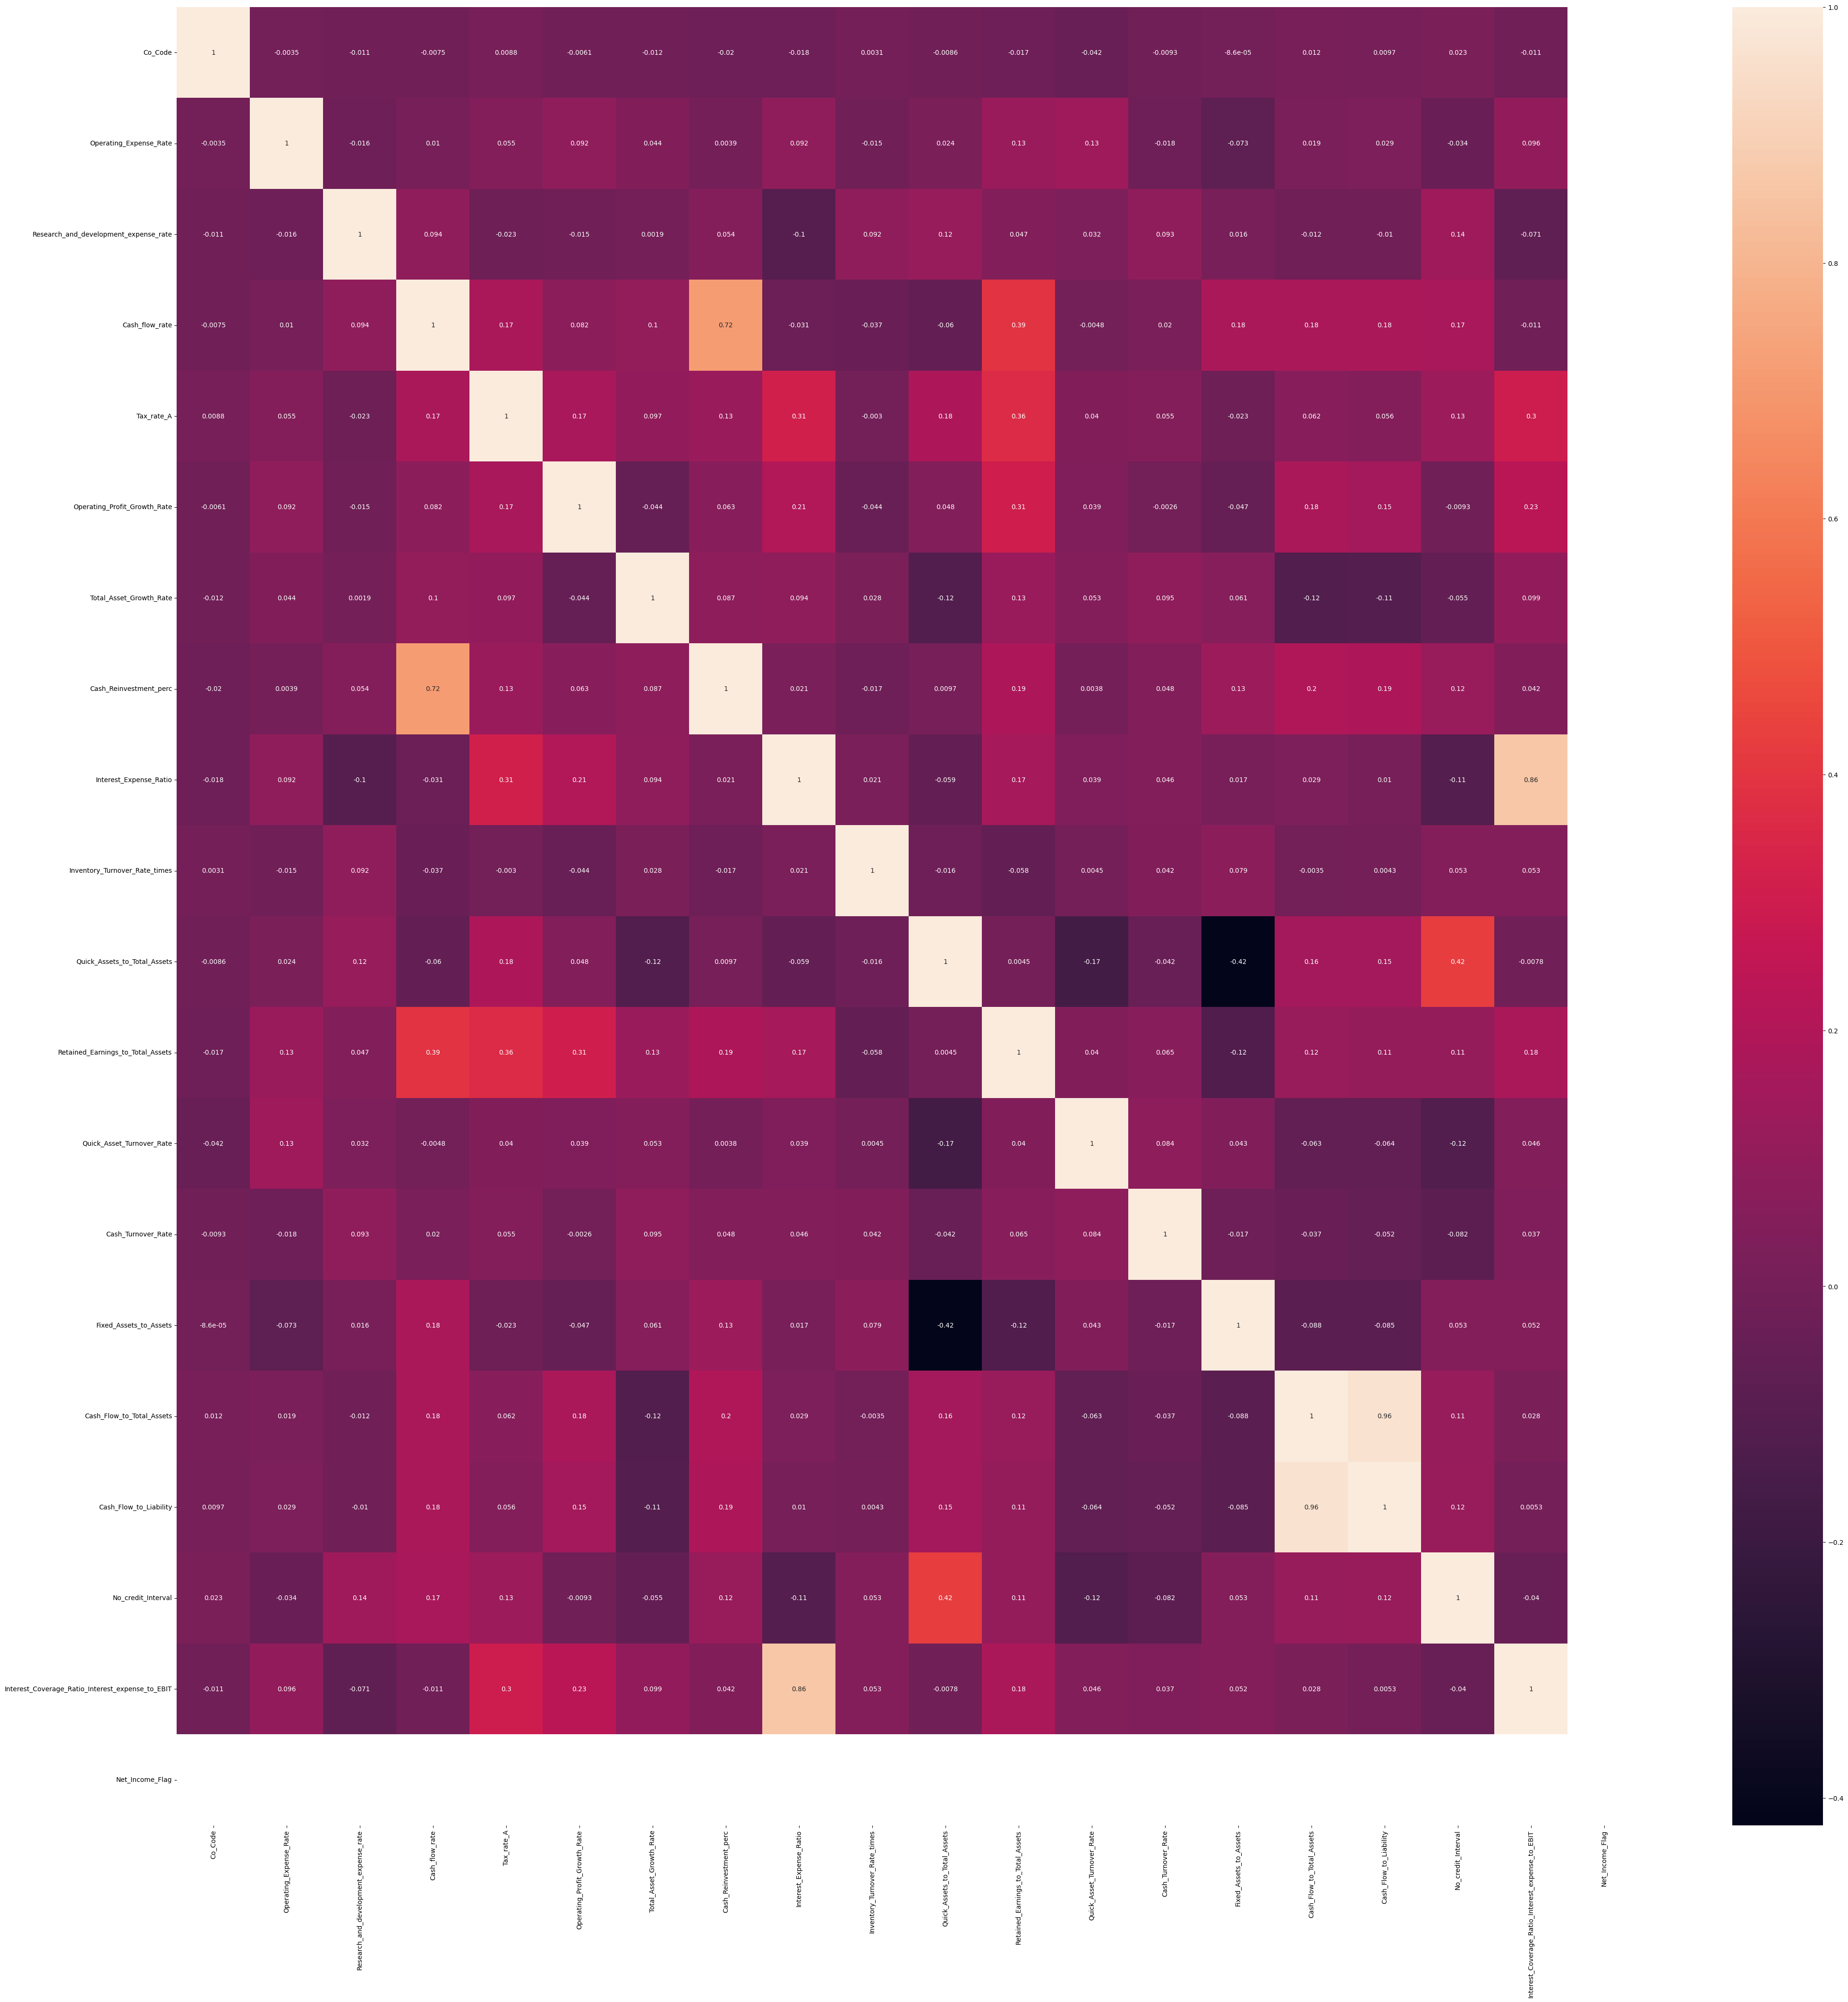

In [68]:
plt.figure(figsize=(50,50))
sb.heatmap(df[best_columns].corr(numeric_only=True),annot=True);


In [69]:
import statsmodels.formula.api as sm

model = sm.logit(formula='Default ~ '+best_columns1,data=df).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.236656
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2037
Method:                           MLE   Df Model:                           20
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.3039
Time:                        15:14:14   Log-Likelihood:                -487.04
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 1.137e-77
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                      

In [70]:
Default_train = pd.concat([x_train, y_train], axis = 1)
Default_test = pd.concat([x_test, y_test], axis = 1)
model = sm.logit(formula='Default ~ '+best_columns1,data=Default_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.402866
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2462
Model:                          Logit   Df Residuals:                     2441
Method:                           MLE   Df Model:                           20
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.4188
Time:                        15:14:14   Log-Likelihood:                -991.86
converged:                       True   LL-Null:                       -1706.5
Covariance Type:            nonrobust   LLR p-value:                5.678e-291
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                      

##PART A: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

In [71]:
y_prob_pred_train = model.predict(Default_train)
y_class_pred_train=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)
y_prob_pred_test = model.predict(Default_test)
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [72]:
print(classification_report(y_test,y_class_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       607
           1       0.84      0.82      0.83       607

    accuracy                           0.83      1214
   macro avg       0.83      0.83      0.83      1214
weighted avg       0.83      0.83      0.83      1214



Confusion Matrix on test data

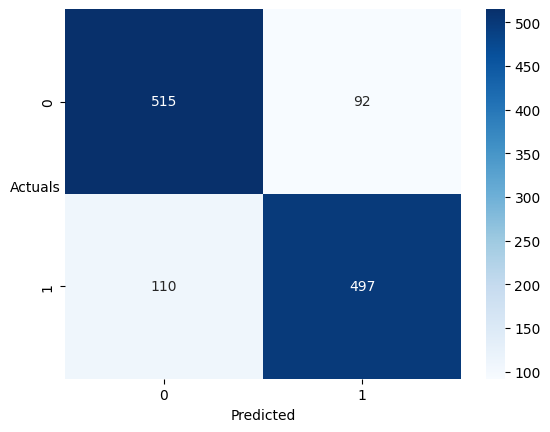

In [73]:
from sklearn import metrics
sb.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [74]:
print(classification_report(y_train,y_class_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1231
           1       0.83      0.83      0.83      1231

    accuracy                           0.83      2462
   macro avg       0.83      0.83      0.83      2462
weighted avg       0.83      0.83      0.83      2462



##PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [76]:
best_grid = grid_search.best_estimator_

In [77]:
pred_train_rf = best_grid.predict(x_train)
pred_test_rf = best_grid.predict(x_test)

##PART A: Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [78]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1231
           1       0.94      0.98      0.96      1231

    accuracy                           0.96      2462
   macro avg       0.96      0.96      0.96      2462
weighted avg       0.96      0.96      0.96      2462



In [79]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       607
           1       0.90      0.94      0.92       607

    accuracy                           0.92      1214
   macro avg       0.92      0.92      0.92      1214
weighted avg       0.92      0.92      0.92      1214



##PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve
LDA = LinearDiscriminantAnalysis()
lda_model = LDA.fit(x_train, y_train)





##PART A: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [81]:
pred_train_lda = lda_model.predict(x_train)
pred_test_lda = lda_model.predict(x_test)


In [82]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1231
           1       0.87      0.92      0.89      1231

    accuracy                           0.89      2462
   macro avg       0.89      0.89      0.89      2462
weighted avg       0.89      0.89      0.89      2462



In [83]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       607
           1       0.87      0.89      0.88       607

    accuracy                           0.88      1214
   macro avg       0.88      0.88      0.88      1214
weighted avg       0.88      0.88      0.88      1214



In [84]:
pred_train_lda_prob = lda_model.predict_proba(x_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

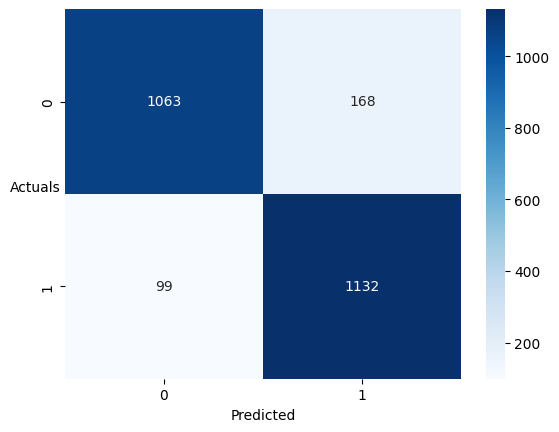

In [85]:
sb.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [86]:

pred_test_lda_prob = lda_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,pred_test_lda_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

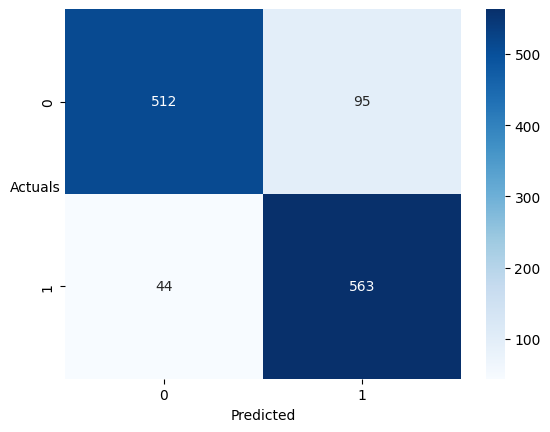

In [87]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

##PART A: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)

###AUC Scores and ROC Curves on Train data

Logistic Regression

AUC Logistic Regression: 0.596


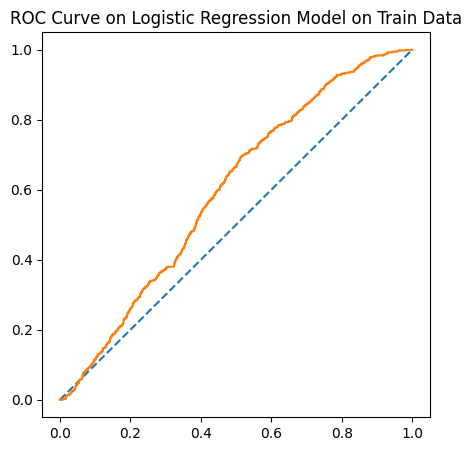

In [88]:
from sklearn.metrics import roc_curve

logr.fit(x_train[best_columns],y_train)
logit_probs = logr.predict_proba(x_train[best_columns])
#Keeping probabilities for positive outcome only
logit_probs = logit_probs[:,1:]
auc_logr = roc_auc_score(y_train,logit_probs)
print('AUC Logistic Regression: %.3f' % auc_logr)
fpr,tpr, threshold = roc_curve(y_train,logit_probs)
plt.figure(figsize=(5,5))
plt.title("ROC Curve on Logistic Regression Model on Train Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

Random Forest Classifier

AUC Random Forest Classifier: 0.993


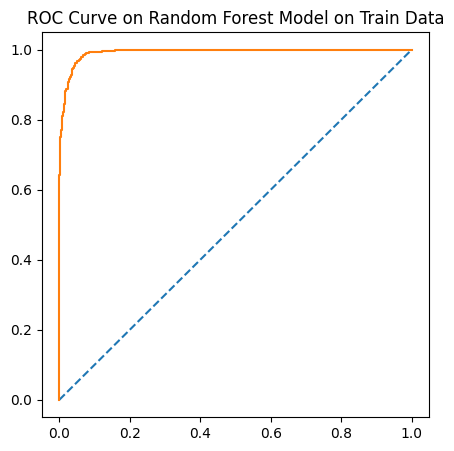

In [89]:
from sklearn.metrics import roc_curve


rfc_probs = best_grid.predict_proba(x_train)
#Keeping probabilities for positive outcome only
rfc_probs = rfc_probs[:,1:]
auc_rfc = roc_auc_score(y_train,rfc_probs)
print('AUC Random Forest Classifier: %.3f' % auc_rfc)
fpr,tpr, threshold = roc_curve(y_train,rfc_probs)
plt.figure(figsize=(5,5))
plt.title("ROC Curve on Random Forest Model on Train Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

LDA model

AUC LDA: 0.948


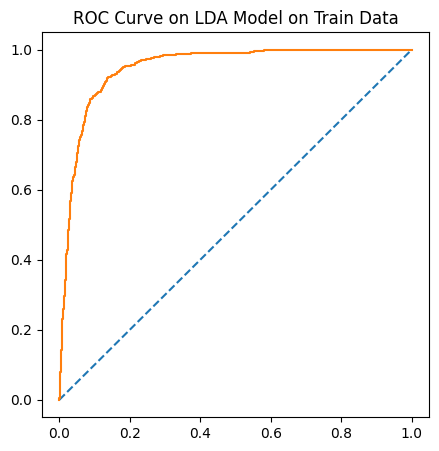

In [90]:
from sklearn.metrics import roc_curve


lda_probs = lda_model.predict_proba(x_train)
#Keeping probabilities for positive outcome only
lda_probs = lda_probs[:,1:]
auc_rfc = roc_auc_score(y_train,lda_probs)
print('AUC LDA: %.3f' % auc_rfc)
fpr,tpr, threshold = roc_curve(y_train,lda_probs)
plt.figure(figsize=(5,5))
plt.title("ROC Curve on LDA Model on Train Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

###AUC Scores and ROC Curves on Test data

Logistic Regression

AUC Logistic Regression: 0.605


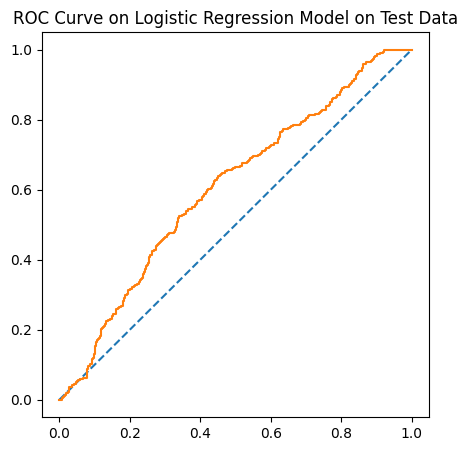

In [91]:
logr.fit(x_test[best_columns],y_test)
logit_probs = logr.predict_proba(x_test[best_columns])
#Keeping probabilities for positive outcome only
logit_probs = logit_probs[:,1:]
auc_logr = roc_auc_score(y_test,logit_probs)
print('AUC Logistic Regression: %.3f' % auc_logr)
fpr,tpr, threshold = roc_curve(y_test,logit_probs)

plt.figure(figsize=(5,5))
plt.title("ROC Curve on Logistic Regression Model on Test Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

Random Forest Classifier

AUC Random Forest Classifier: 0.978


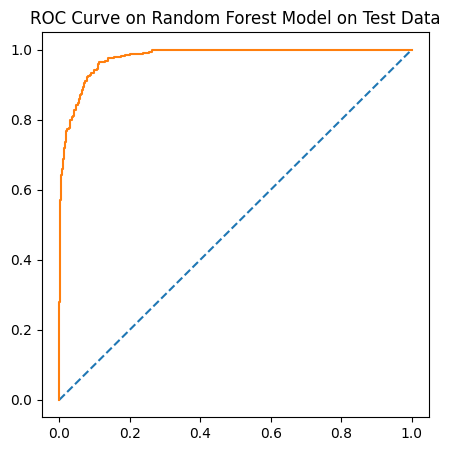

In [92]:
rfc_probs = best_grid.predict_proba(x_test)
#Keeping probabilities for positive outcome only
rfc_probs = rfc_probs[:,1:]
auc_rfc = roc_auc_score(y_test,rfc_probs)
print('AUC Random Forest Classifier: %.3f' % auc_rfc)
fpr,tpr, threshold = roc_curve(y_test,rfc_probs)
plt.figure(figsize=(5,5))
plt.title("ROC Curve on Random Forest Model on Test Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

LDA model

AUC LDA: 0.943


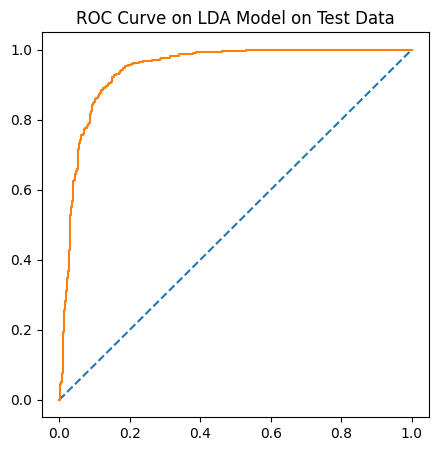

In [93]:

lda_probs = lda_model.predict_proba(x_test)
#Keeping probabilities for positive outcome only
lda_probs = lda_probs[:,1:]
auc_rfc = roc_auc_score(y_test,lda_probs)
print('AUC LDA: %.3f' % auc_rfc)
fpr,tpr, threshold = roc_curve(y_test,lda_probs)
plt.figure(figsize=(5,5))
plt.title("ROC Curve on LDA Model on Test Data")
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);

#PART B:

In [18]:
# !pip install tabulate
# !pip install iexfinance
# !pip install datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm
from tabulate import tabulate


from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [19]:
stock_prices = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FRA Module/Market+Risk+Dataset.csv")
stock_prices.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [20]:
stock_prices.columns = stock_prices.columns.str.replace(' ','')
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               314 non-null    object
 1   Infosys            314 non-null    int64 
 2   IndianHotel        314 non-null    int64 
 3   Mahindra&Mahindra  314 non-null    int64 
 4   AxisBank           314 non-null    int64 
 5   SAIL               314 non-null    int64 
 6   ShreeCement        314 non-null    int64 
 7   SunPharma          314 non-null    int64 
 8   JindalSteel        314 non-null    int64 
 9   IdeaVodafone       314 non-null    int64 
 10  JetAirways         314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [21]:
stock_prices.duplicated().sum()

0

In [22]:
stock_prices.describe().round(2).T

count      mean      std     min       25%      50%  \
Infosys            314.0    511.34   135.95   234.0    424.00    466.5   
IndianHotel        314.0    114.56    22.51    64.0     96.00    115.0   
Mahindra&Mahindra  314.0    636.68   102.88   284.0    572.00    625.0   
AxisBank           314.0    540.74   115.84   263.0    470.50    528.0   
SAIL               314.0     59.10    15.81    21.0     47.00     57.0   
ShreeCement        314.0  14806.41  4288.28  5543.0  10952.25  16018.5   
SunPharma          314.0    633.47   171.86   338.0    478.50    614.0   
JindalSteel        314.0    147.63    65.88    53.0     88.25    142.5   
IdeaVodafone       314.0     53.71    31.25     3.0     25.25     53.0   
JetAirways         314.0    372.66   202.26    14.0    243.25    376.0   

                        75%      max  
Infosys              630.75    810.0  
IndianHotel          134.00    157.0  
Mahindra&Mahindra    678.00    956.0  
AxisBank             605.25    808.0  
SAIL                  71.75    104.0  
ShreeCement        17773.25  24806.0  
SunPharma            785.00   1089.0  
JindalSteel          182.75    338.0  
IdeaVodafone          82.00    117.0  
JetAirways           534.00    871.0

In [23]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


##PART B: Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

Lets us plot & see price trend over time for Infosys

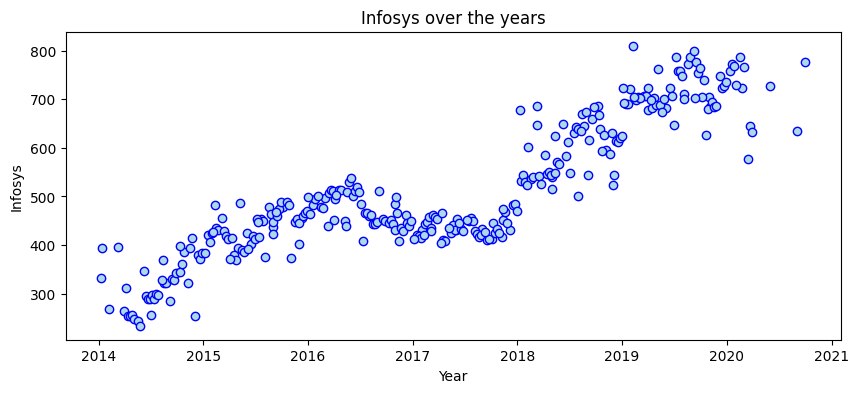

In [24]:
plt.figure(figsize = (10, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')



plt.show()

Lets us plot & see price trend over time for IdeaVodafone




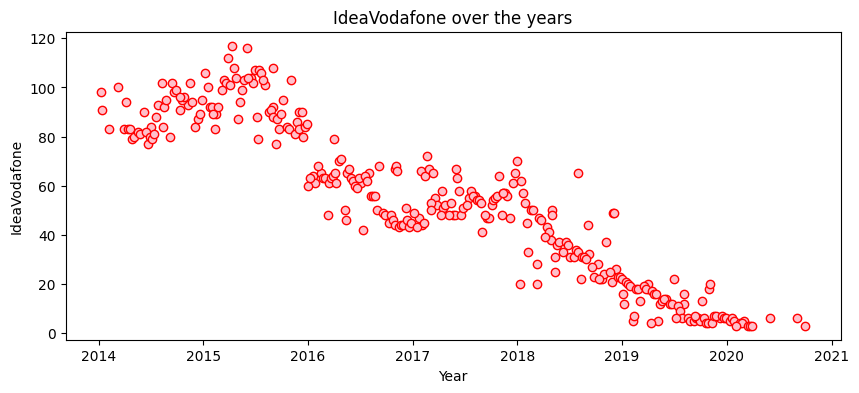

In [25]:
plt.figure(figsize = (10, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['IdeaVodafone'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('IdeaVodafone')
plt.title('IdeaVodafone over the years')
plt.show()

##PART B: Calculate Returns for all stocks with inference

Steps for calculating returns from prices:

*   Take logarithms
*   Take differences




In [26]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [27]:
stock_returns

Infosys  IndianHotel  Mahindra&Mahindra  AxisBank      SAIL  \
0         NaN          NaN                NaN       NaN       NaN   
1   -0.026873    -0.014599           0.006572  0.048247  0.028988   
2   -0.011742     0.000000          -0.008772 -0.021979 -0.028988   
3   -0.003945     0.000000           0.072218  0.047025  0.000000   
4    0.011788    -0.045120          -0.012371 -0.003540 -0.076373   
..        ...          ...                ...       ...       ...   
309  0.009649    -0.110348           0.030305 -0.057580 -0.087011   
310 -0.139625    -0.051293          -0.093819 -0.145324 -0.095310   
311 -0.094207    -0.236389          -0.285343 -0.284757 -0.105361   
312  0.109856    -0.182322          -0.091269 -0.173019 -0.251314   
313 -0.017228     0.000000          -0.031198  0.051432  0.090972   

     ShreeCement  SunPharma  JindalSteel  IdeaVodafone  JetAirways  
0            NaN        NaN          NaN           NaN         NaN  
1       0.032831   0.094491    -0.065882      0.011976    0.086112  
2      -0.013888  -0.004930     0.000000     -0.011976   -0.078943  
3       0.007583  -0.004955    -0.018084      0.000000    0.007117  
4      -0.019515   0.011523    -0.140857     -0.049393   -0.148846  
..           ...        ...          ...           ...         ...  
309     0.023688   0.072383    -0.053346     -0.287682   -0.127833  
310    -0.081183  -0.043319    -0.187816      0.693147   -0.200671  
311    -0.119709  -0.050745    -0.141830     -0.693147   -0.117783  
312    -0.067732  -0.076851    -0.165324      0.000000   -0.133531  
313    -0.006816   0.040585    -0.081917      0.000000    0.000000  

[314 rows x 10 columns]

##PART B: Calculate Stock Means and Standard Deviation for all stocks with inference

Stock Means

In [28]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys              0.002794
IndianHotel          0.000266
Mahindra&Mahindra   -0.001506
AxisBank             0.001167
SAIL                -0.003463
ShreeCement          0.003681
SunPharma           -0.001455
JindalSteel         -0.004123
IdeaVodafone        -0.010608
JetAirways          -0.009548
dtype: float64

Stock Standard Deviation

In [29]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values()

Infosys              0.035070
ShreeCement          0.039917
Mahindra&Mahindra    0.040169
SunPharma            0.045033
AxisBank             0.045828
IndianHotel          0.047131
SAIL                 0.062188
JindalSteel          0.075108
JetAirways           0.097972
IdeaVodafone         0.104315
dtype: float64

In [30]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

Average  Volatility
Infosys            0.002794    0.035070
IndianHotel        0.000266    0.047131
Mahindra&Mahindra -0.001506    0.040169
AxisBank           0.001167    0.045828
SAIL              -0.003463    0.062188
ShreeCement        0.003681    0.039917
SunPharma         -0.001455    0.045033
JindalSteel       -0.004123    0.075108
IdeaVodafone      -0.010608    0.104315
JetAirways        -0.009548    0.097972

##PART B: Draw a plot of Stock Means vs Standard Deviation and state your inference

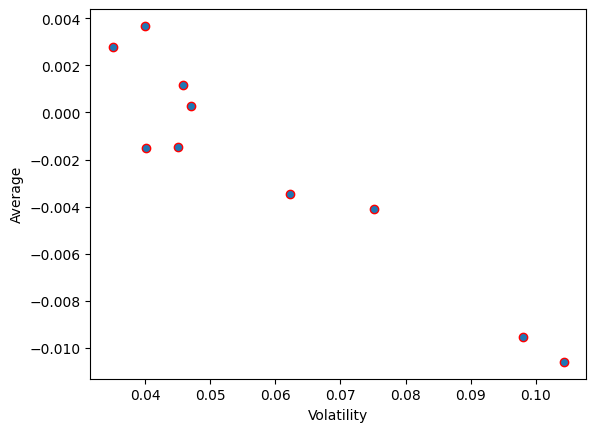

In [31]:
plt.scatter(stock_sd, stock_means, edgecolors='r')
plt.xlabel("Volatility")
plt.ylabel("Average")
plt.show()


Best stocks are the ones with higher average age and less volatility

In [32]:
df.sort_values(['Average','Volatility'],ascending=[False,True])

Average  Volatility
ShreeCement        0.003681    0.039917
Infosys            0.002794    0.035070
AxisBank           0.001167    0.045828
IndianHotel        0.000266    0.047131
SunPharma         -0.001455    0.045033
Mahindra&Mahindra -0.001506    0.040169
SAIL              -0.003463    0.062188
JindalSteel       -0.004123    0.075108
JetAirways        -0.009548    0.097972
IdeaVodafone      -0.010608    0.104315